# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params,
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 5, Population: 447, Unique population: 406, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 8, Population: 436, Unique population: 356, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 14, Population: 427, Unique population: 288, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON 

IndexError: index 0 is out of bounds for axis 0 with size 0

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

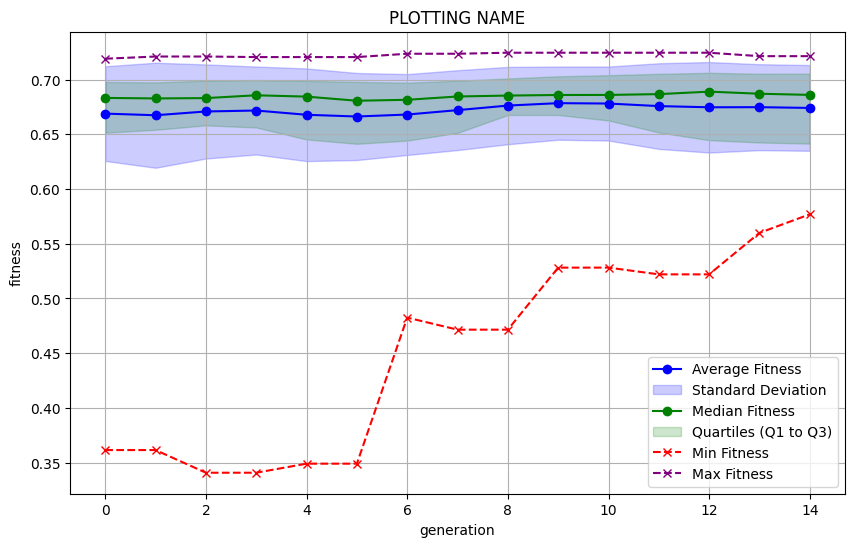

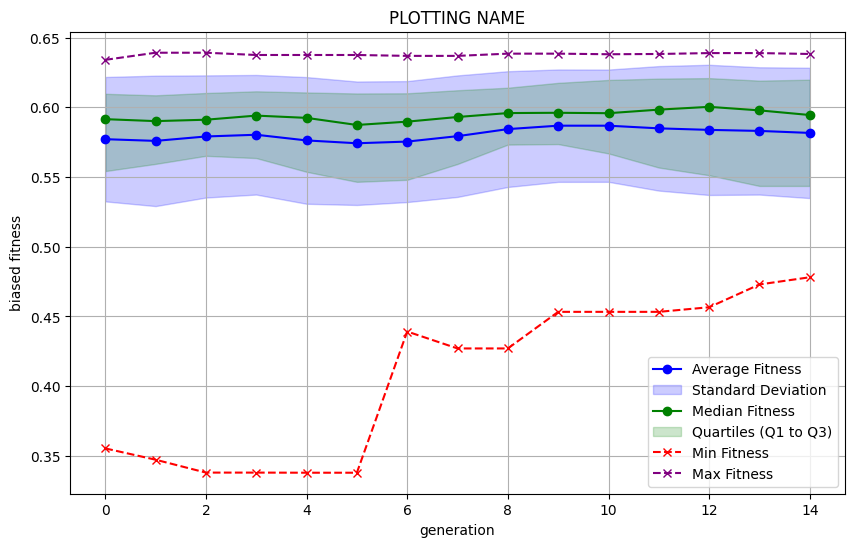

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_413: ['RayShape_491', 'CornerTransformation_10']
predict: (0.28852329779932884, 373.02597110000005, 456.5706310999999)
biased_fitness: 0.6324027131093961, fitness: 0.7167840110067119
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


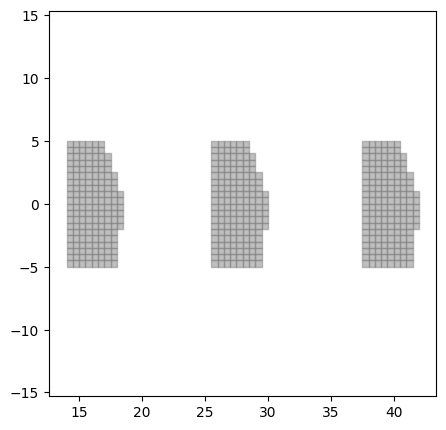

--------------------------------------------------
label: VentHole Chromosome_467: ['RayShape_219', 'GridStrictTransformation_344']
predict: (0.29081573059717236, 373.6867242000002, 457.8408331999999)
biased_fitness: 0.5944644842395861, fitness: 0.6842049070282759
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


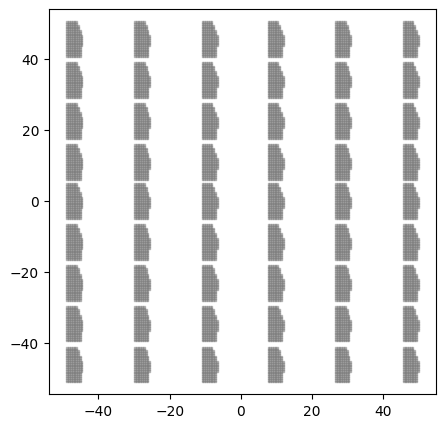

--------------------------------------------------
label: VentHole Chromosome_418: ['CircleShape_449', 'CornerTransformation_467']
predict: (0.28897554033241857, 373.03989390000004, 459.0397572999999)
biased_fitness: 0.6210634512461399, fitness: 0.6998463406758145
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


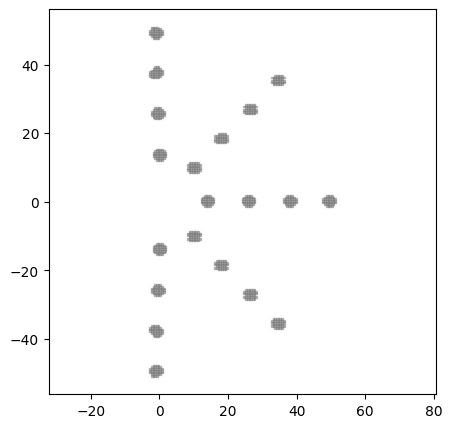

--------------------------------------------------
label: VentHole Chromosome_467: ['CircleShape_341', 'CornerTransformation_267']
predict: (0.2890169743286002, 373.1888401, 457.42378829999996)
biased_fitness: 0.6229705822995975, fitness: 0.7067671147139983
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 3.0, ]


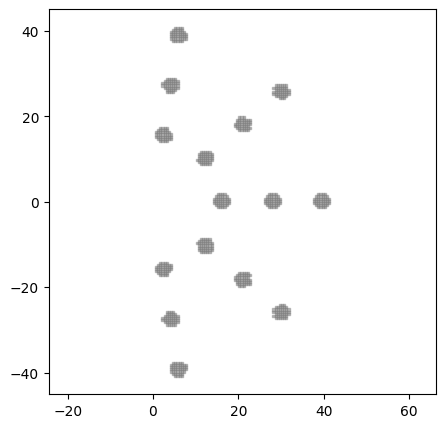

--------------------------------------------------
label: VentHole Chromosome_431: ['DonutShape_432', 'CircularStrictTransformation_432']
predict: (0.2968482235863852, 373.7158541999999, 460.8024957999998)
biased_fitness: 0.5039406071906081, fitness: 0.6089260141361494
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


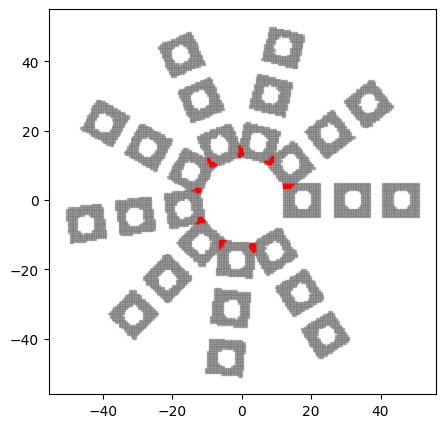

--------------------------------------------------
label: VentHole Chromosome_491: ['HoleShape_260', 'CircularStrictTransformation_449']
predict: (0.2961636213534722, 373.88489480000004, 459.6612719999997)
biased_fitness: 0.5149622830513896, fitness: 0.6206329524652793
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


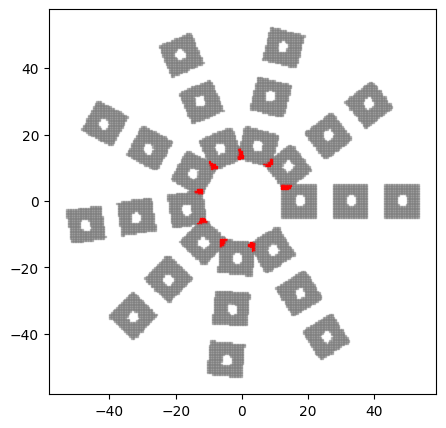

--------------------------------------------------
label: VentHole Chromosome_418: ['HoleShape_221', 'CornerTransformation_495']
predict: (0.29314196300013684, 374.1106362999999, 465.8563889)
biased_fitness: 0.5437465586980845, fitness: 0.618745243998632
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


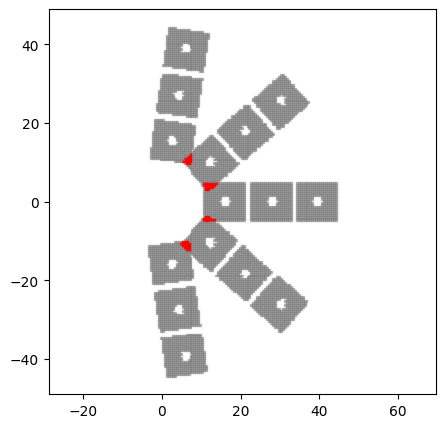

--------------------------------------------------
label: VentHole Chromosome_432: ['HoleShape_344', 'CornerTransformation_431']
predict: (0.29082963200717415, 374.11808289999976, 458.1452292)
biased_fitness: 0.5915042789995628, fitness: 0.6803871194282594
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


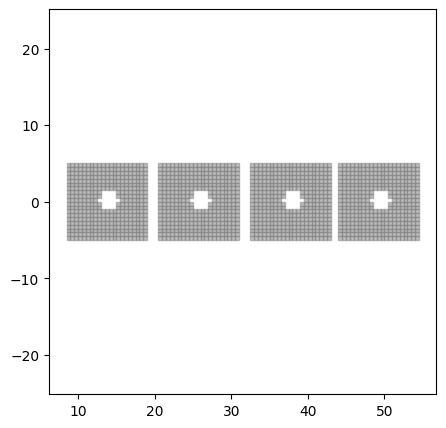

--------------------------------------------------
label: VentHole Chromosome_171: ['CircleShape_384', 'CornerTransformation_204']
predict: (0.2890169743286002, 373.1888401, 457.42378829999996)
biased_fitness: 0.6229705822995975, fitness: 0.7067671147139983
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


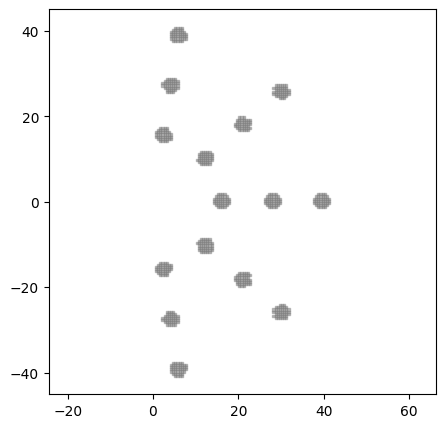

--------------------------------------------------
label: VentHole Chromosome_245: ['DoubleParabolicShape_467', 'CircularStrictTransformation_391']
predict: (0.2906868573117185, 372.9070509999999, 458.71547929999986)
biased_fitness: 0.5984177840359416, fitness: 0.6850187753828161
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


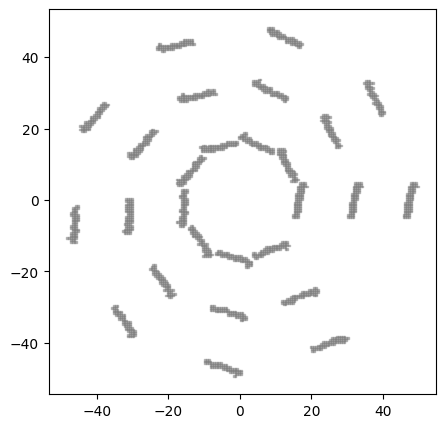

--------------------------------------------------
label: VentHole Chromosome_267: ['DonutShape_409', 'CircularStrictTransformation_93']
predict: (0.2958245266229276, 374.1119084, 458.3177499999995)
biased_fitness: 0.5212615852790148, fitness: 0.6296064417707267
shape parameter:
parameter_list: [ r_inner: 2.786228874516788, r_outer: 7.282099132405934, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


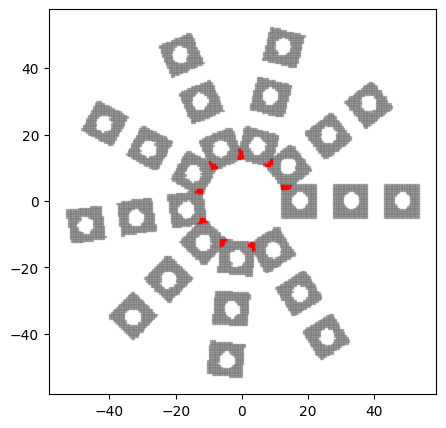

--------------------------------------------------
label: VentHole Chromosome_322: ['DonutShape_491', 'CircularStrictTransformation_418']
predict: (0.2970256438461427, 373.3662897, 463.042639)
biased_fitness: 0.49872425965400186, fitness: 0.5976989180385728
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


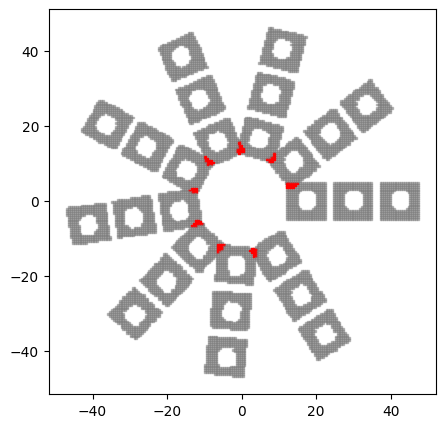

--------------------------------------------------
label: VentHole Chromosome_409: ['CircleShape_467', 'CircularStrictTransformation_344']
predict: (0.28954293907920214, 372.9892343000002, 458.78173219999996)
biased_fitness: 0.6138892169911689, fitness: 0.6957157767079777
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


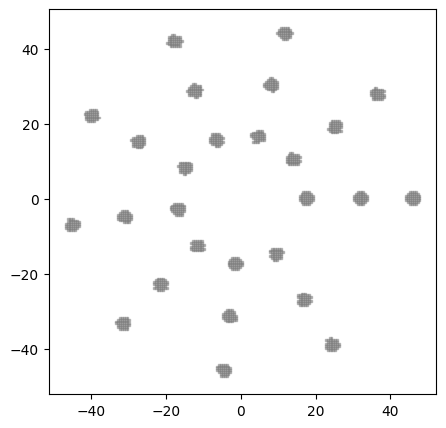

--------------------------------------------------
label: VentHole Chromosome_431: ['TrapezoidShape_409', 'CircularStrictTransformation_100']
predict: (0.29410276782205336, 373.83365620000006, 464.84814030000024)
biased_fitness: 0.5336966888912521, fitness: 0.6155633392794648
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


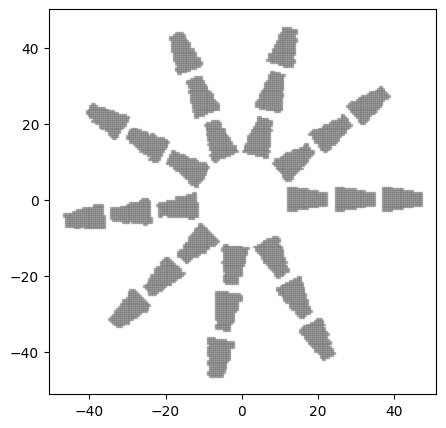

--------------------------------------------------
label: VentHole Chromosome_219: ['TriangleShape_208', 'GridStrictTransformation_171']
predict: (0.2913779007636603, 373.5913936999998, 458.78270570000007)
biased_fitness: 0.5851870094087561, fitness: 0.6743504953633973
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


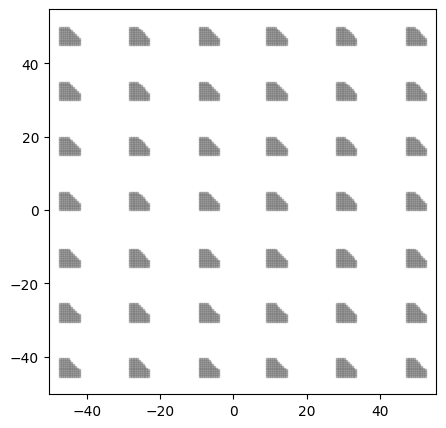

--------------------------------------------------
label: VentHole Chromosome_432: ['TrapezoidShape_463', 'CircularStrictTransformation_344']
predict: (0.2934814068144038, 373.2012107, 457.7596165)
biased_fitness: 0.5597350180983465, fitness: 0.6603817958559618
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


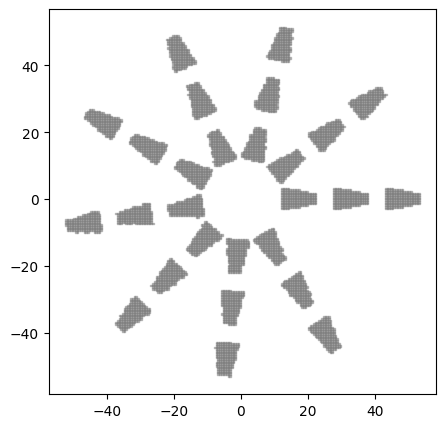

--------------------------------------------------
label: VentHole Chromosome_289: ['TrapezoidShape_431', 'CircularStrictTransformation_434']
predict: (0.29435727799042555, 373.2756466, 459.51912770000024)
biased_fitness: 0.5435816197340417, fitness: 0.6424533485957432
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


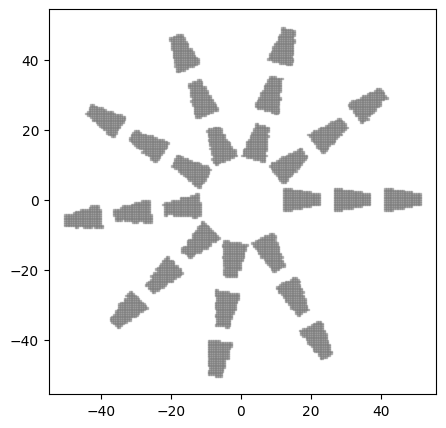

--------------------------------------------------
label: VentHole Chromosome_260: ['DoubleParabolicShape_463', 'CircularStrictTransformation_245']
predict: (0.291306957047593, 372.9521578, 457.9095799999997)
biased_fitness: 0.5911226523336981, fitness: 0.682621740524071
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


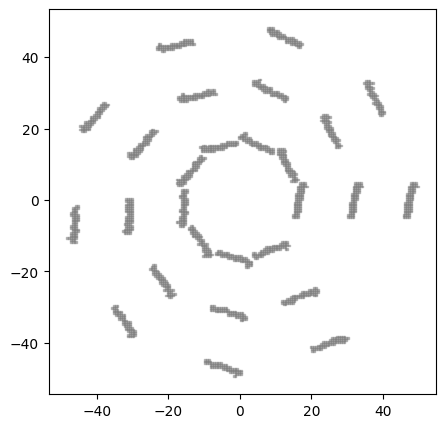

--------------------------------------------------
label: VentHole Chromosome_10: ['HoleShape_324', 'CircularStrictTransformation_432']
predict: (0.2961636213534722, 373.88489480000004, 459.6612719999997)
biased_fitness: 0.5149622830513896, fitness: 0.6206329524652793
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


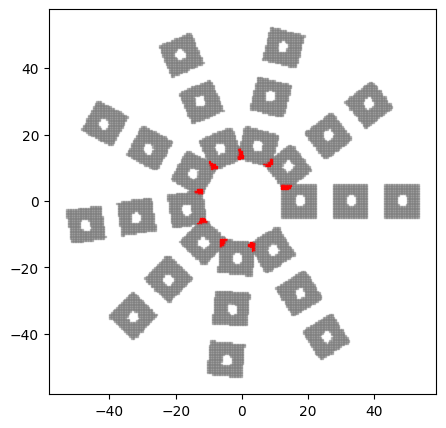

--------------------------------------------------
label: VentHole Chromosome_100: ['DonutShape_10', 'CircularStrictTransformation_324']
predict: (0.2913506643877537, 373.68074679999995, 457.56019519999995)
biased_fitness: 0.5875665741714484, fitness: 0.6802886461224634
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


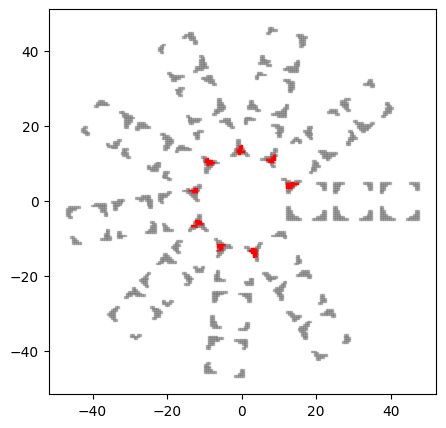

--------------------------------------------------
label: VentHole Chromosome_344: ['RayShape_309', 'GridStrictTransformation_449']
predict: (0.2910354492647782, 373.35252929999996, 458.1204724)
biased_fitness: 0.5925001189931053, fitness: 0.6822804988522182
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


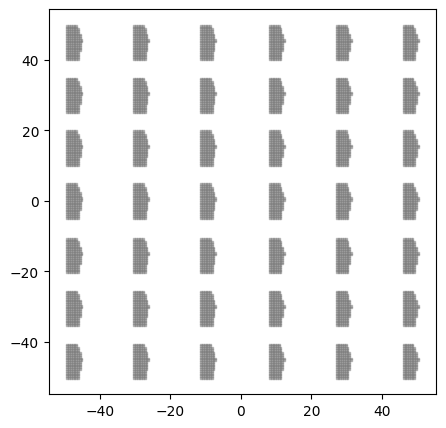

--------------------------------------------------
label: VentHole Chromosome_2: ['DonutShape_495', 'GridStrictTransformation_322']
predict: (0.2969573108362571, 374.26027939999994, 460.61665489999984)
biased_fitness: 0.5000629414924012, fitness: 0.60604222013743
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


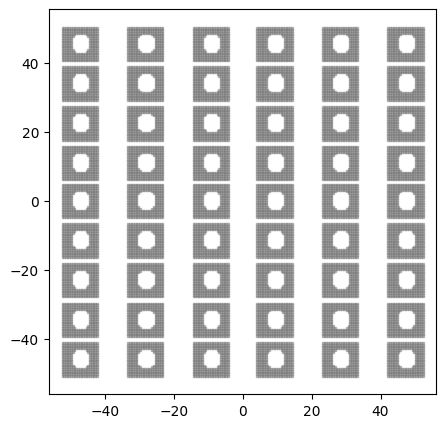

--------------------------------------------------
label: VentHole Chromosome_267: ['RayShape_267', 'CornerTransformation_234']
predict: (0.29049539149550885, 372.92670260000006, 457.8902395000001)
biased_fitness: 0.6026505270628755, fitness: 0.6909613745449106
shape parameter:
parameter_list: [ upper_slope: 1.0747880767010933, nose_point: 1.19259352592516, lower_coefficient: 2.9196450121786457, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 3.0, ]


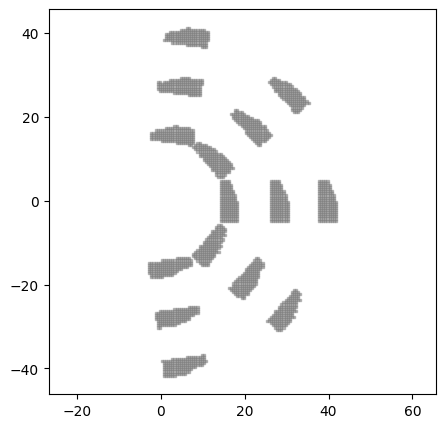

--------------------------------------------------
label: VentHole Chromosome_467: ['CircleShape_10', 'GridStrictTransformation_289']
predict: (0.2900967395966576, 373.0392230000002, 456.32077319999985)
biased_fitness: 0.6108079842467926, fitness: 0.7022326230334235
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


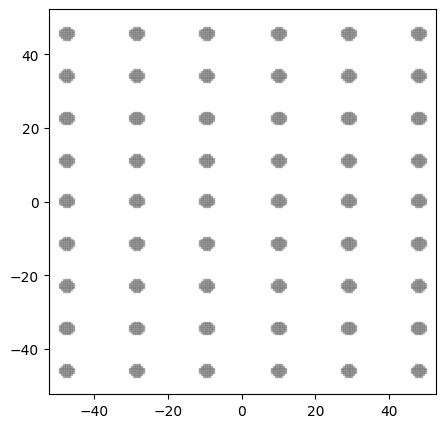

--------------------------------------------------
label: VentHole Chromosome_309: ['CircleShape_93', 'CornerTransformation_10']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


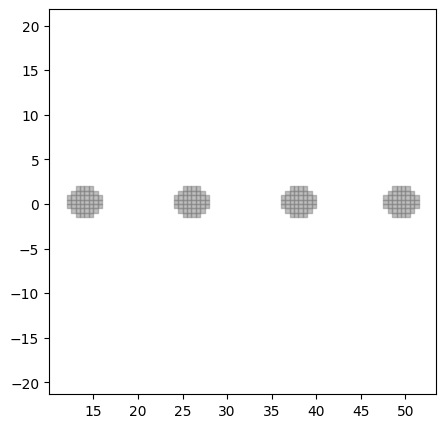

--------------------------------------------------
label: VentHole Chromosome_6: ['RayShape_409', 'CornerTransformation_322']
predict: (0.2889854067507247, 373.24361220000014, 456.3526053)
biased_fitness: 0.6252810338898532, fitness: 0.7121648449927521
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


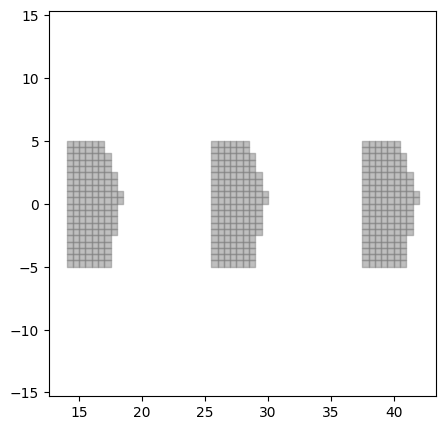

--------------------------------------------------
label: VentHole Chromosome_467: ['TriangleShape_222', 'CornerTransformation_413']
predict: (0.28844729416313797, 373.2897598999999, 457.7832235999999)
biased_fitness: 0.6297226350160688, fitness: 0.710162140868621
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


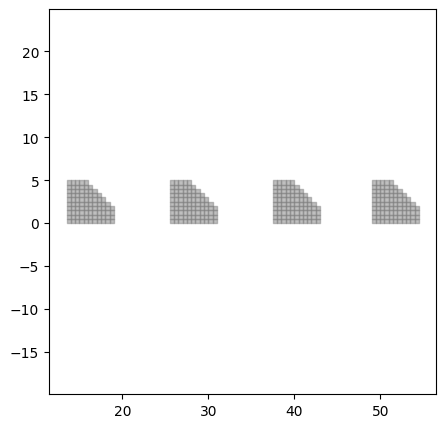

--------------------------------------------------
label: VentHole Chromosome_100: ['RayShape_322', 'CircularStrictTransformation_431']
predict: (0.29179664724747933, 372.90525789999987, 456.4835331999998)
biased_fitness: 0.5873535826352903, fitness: 0.6850895720252083
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


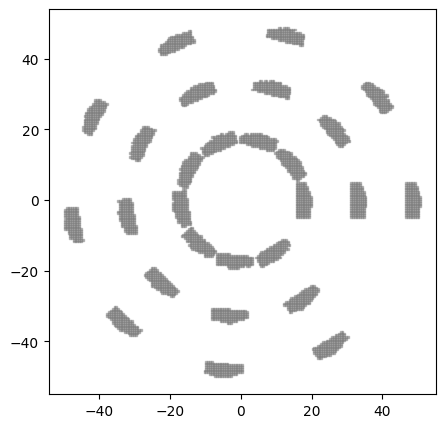

--------------------------------------------------
label: VentHole Chromosome_171: ['HoleShape_204', 'CornerTransformation_2']
predict: (0.28924267826412886, 373.42065090000017, 455.7393298999999)
biased_fitness: 0.6220205900021951, fitness: 0.7117733133587109
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


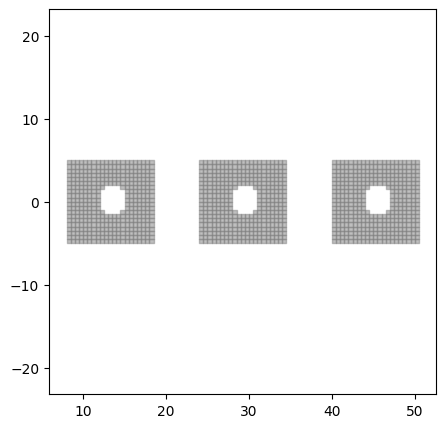

--------------------------------------------------
label: VentHole Chromosome_204: ['TriangleShape_409', 'CircularStrictTransformation_260']
predict: (0.2908565683736355, 373.2065250000001, 457.09018289999983)
biased_fitness: 0.5977950519691028, fitness: 0.6899507767636452
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


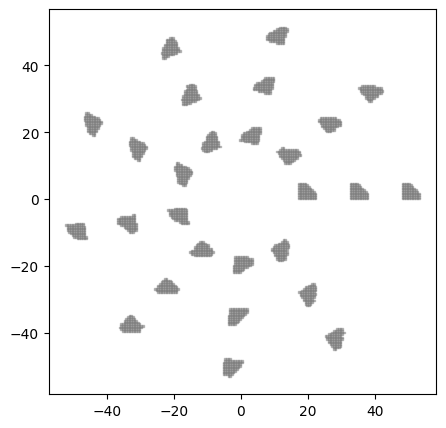

--------------------------------------------------
label: VentHole Chromosome_222: ['TriangleShape_100', 'CircularStrictTransformation_463']
predict: (0.2915017160380988, 373.2991019000001, 458.1313092999998)
biased_fitness: 0.5862178473666162, fitness: 0.6778307836190121
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


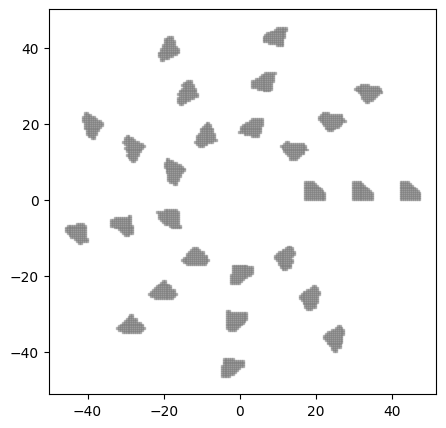

--------------------------------------------------
label: VentHole Chromosome_100: ['TrapezoidShape_255', 'CircularStrictTransformation_341']
predict: (0.29409222530137513, 373.5345508000001, 458.9034224999999)
biased_fitness: 0.5472292467807478, fitness: 0.6468878804862486
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


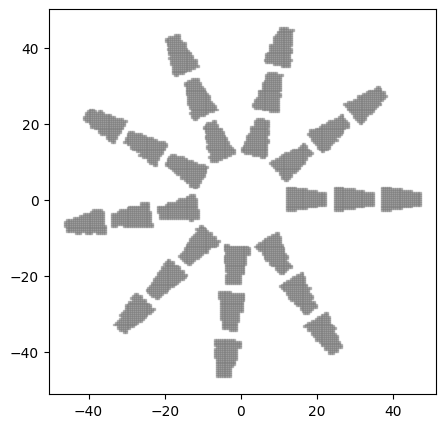

--------------------------------------------------
label: VentHole Chromosome_267: ['DonutShape_93', 'CornerTransformation_430']
predict: (0.2892517400881507, 373.3132282000001, 458.0452678999996)
biased_fitness: 0.6178189619658906, fitness: 0.7006901186184946
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


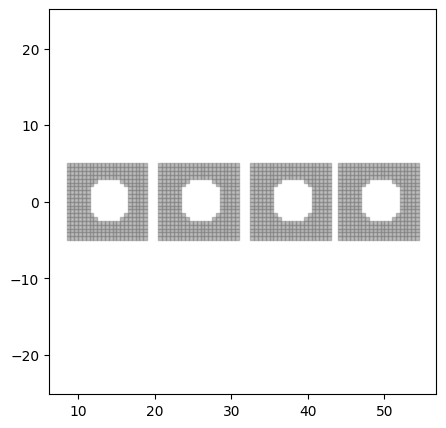

--------------------------------------------------
label: VentHole Chromosome_467: ['RayShape_430', 'CircularStrictTransformation_434']
predict: (0.292917815841252, 374.21621079999977, 461.8521364999997)
biased_fitness: 0.5543652512224738, fitness: 0.6404801050874828
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 4.27255042283659, phi: 0.7853981633974483, ]


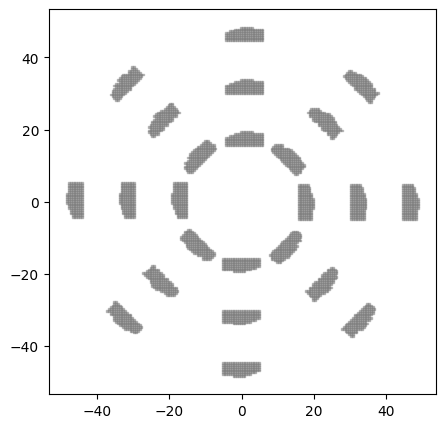

--------------------------------------------------
label: VentHole Chromosome_171: ['TrapezoidShape_6', 'CircularStrictTransformation_171']
predict: (0.29409222530137513, 373.5345508000001, 458.9034224999999)
biased_fitness: 0.5472292467807478, fitness: 0.6468878804862486
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


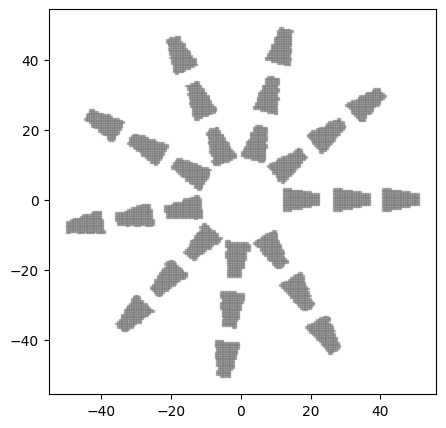

--------------------------------------------------
label: VentHole Chromosome_309: ['RayShape_449', 'GridStrictTransformation_413']
predict: (0.2921487179849849, 372.96915079999997, 461.53783309999994)
biased_fitness: 0.571996528010212, fitness: 0.6559779006501516
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


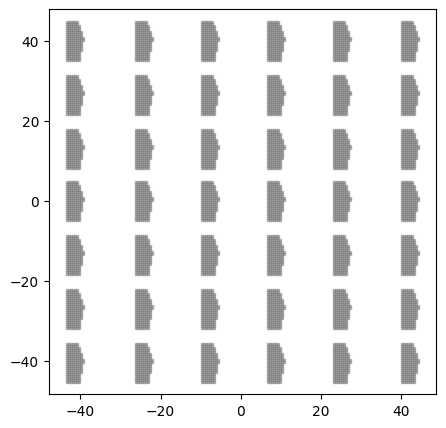

--------------------------------------------------
label: VentHole Chromosome_432: ['RayShape_467', 'CircularStrictTransformation_100']
predict: (0.2926601895478682, 373.0818649999999, 458.7202305000001)
biased_fitness: 0.5699075603298452, fitness: 0.6643876270213177
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


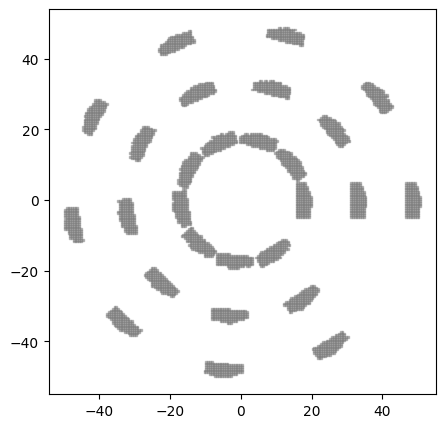

--------------------------------------------------
label: VentHole Chromosome_267: ['RayShape_467', 'CornerTransformation_376']
predict: (0.28921680316829024, 373.13088059999995, 455.7497652000002)
biased_fitness: 0.6238108222439365, fitness: 0.7134287393170968
shape parameter:
parameter_list: [ upper_slope: 1.2818882590902942, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


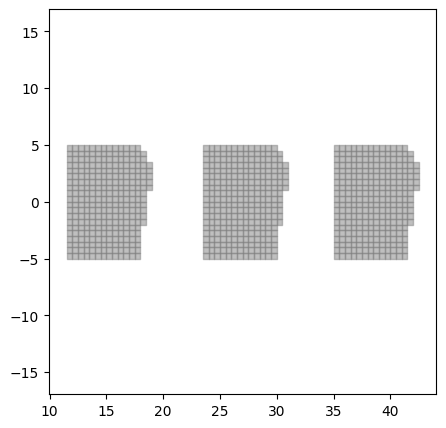

--------------------------------------------------
label: VentHole Chromosome_204: ['WingShape_409', 'GridStrictTransformation_409']
predict: (0.29057474981703457, 373.3423497, 458.36347679999994)
biased_fitness: 0.598514800461516, fitness: 0.6857233693296545
shape parameter:
parameter_list: [ c: 2.8055001063969134, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


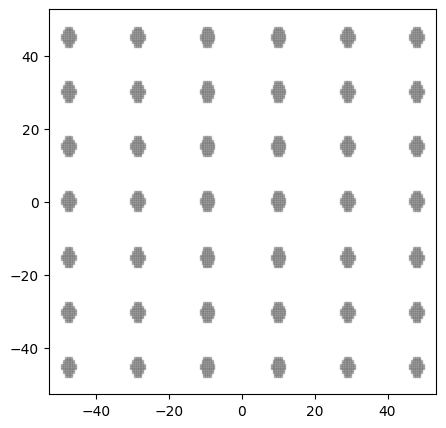

--------------------------------------------------
label: VentHole Chromosome_431: ['TrapezoidShape_430', 'GridStrictTransformation_341']
predict: (0.2946920225819807, 373.17899700000004, 458.61729180000003)
biased_fitness: 0.54118211525227, fitness: 0.6440983301801927
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


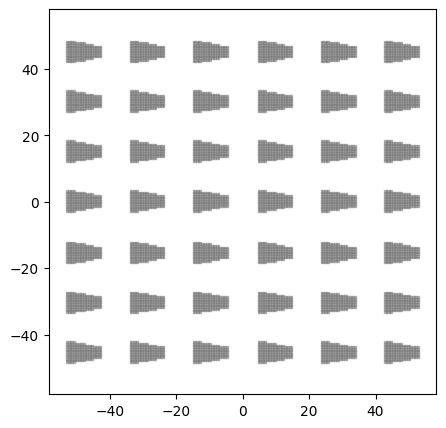

--------------------------------------------------
label: VentHole Chromosome_467: ['CircleShape_463', 'CircularStrictTransformation_289']
predict: (0.28934011581555996, 372.83238089999975, 457.08329919999983)
biased_fitness: 0.6209098756821619, fitness: 0.7070204413444023
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


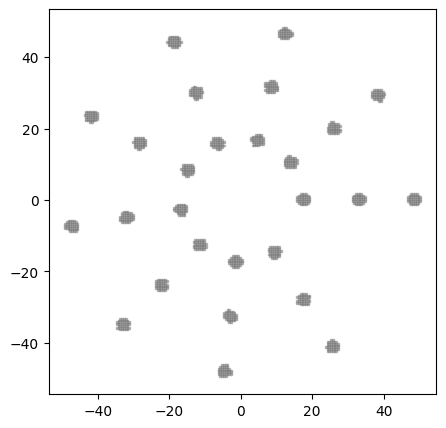

--------------------------------------------------
label: VentHole Chromosome_491: ['RayShape_449', 'GridStrictTransformation_467']
predict: (0.28980743227785544, 373.49375820000006, 456.1544388)
biased_fitness: 0.6129182795100235, fitness: 0.7036846922214454
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


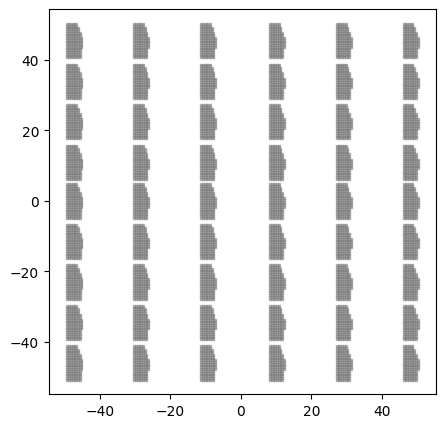

--------------------------------------------------
label: VentHole Chromosome_171: ['HoleShape_331', 'CircularStrictTransformation_463']
predict: (0.29646163315551544, 373.1171204, 457.02102879999984)
biased_fitness: 0.5199094762227842, fitness: 0.6346929224448464
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


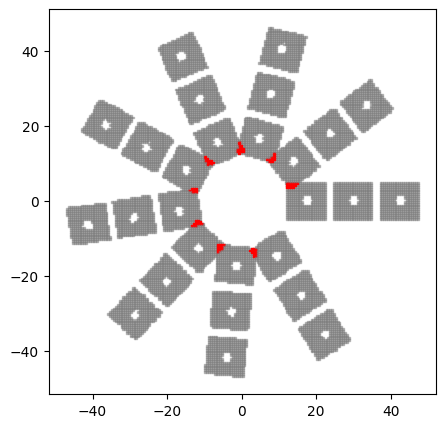

--------------------------------------------------
label: VentHole Chromosome_171: ['DonutShape_204', 'CircularStrictTransformation_463']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


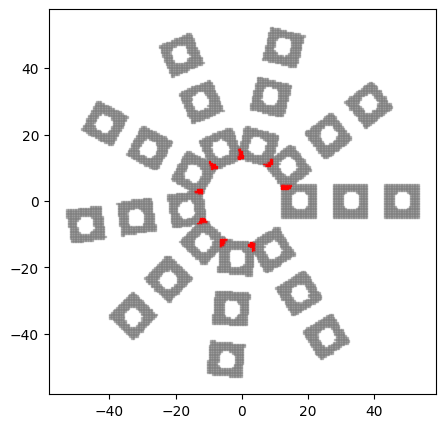

--------------------------------------------------
label: VentHole Chromosome_430: ['HoleShape_430', 'GridStrictTransformation_267']
predict: (0.296236036395809, 374.90818229999985, 463.32709419999986)
biased_fitness: 0.5015003905586752, fitness: 0.5964632535419115
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


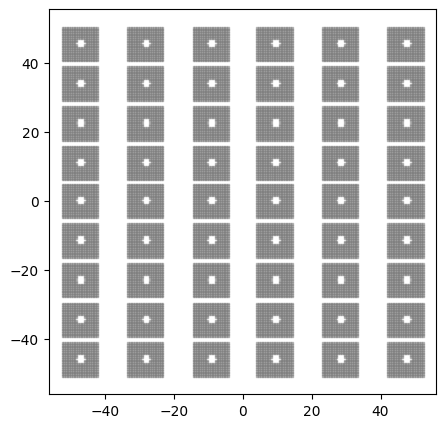

--------------------------------------------------
label: VentHole Chromosome_260: ['HoleShape_221', 'CornerTransformation_93']
predict: (0.2897401820503829, 373.76688469999993, 456.09586489999964)
biased_fitness: 0.6126112979946406, fitness: 0.7032844314961733
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


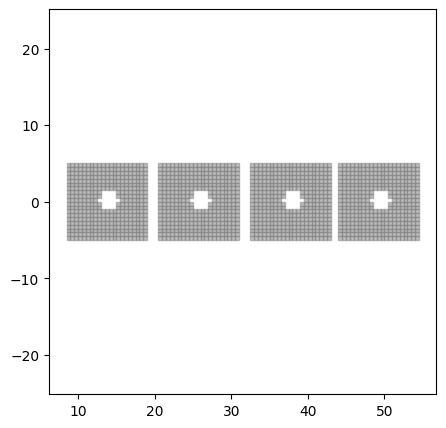

--------------------------------------------------
label: VentHole Chromosome_2: ['RayShape_171', 'CornerTransformation_430']
predict: (0.2886078852817442, 373.47998040000004, 458.1575175999997)
biased_fitness: 0.6257746688555814, fitness: 0.7057336571825591
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


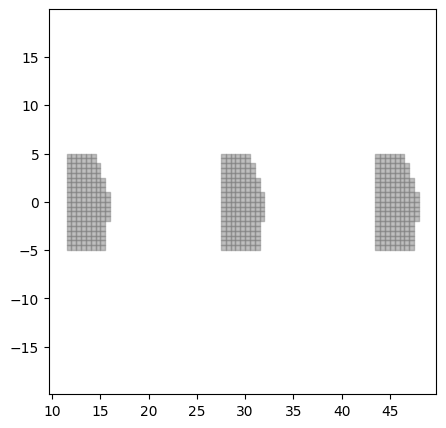

--------------------------------------------------
label: VentHole Chromosome_105: ['DoubleParabolicShape_100', 'CornerTransformation_10']
predict: (0.288698813045285, 373.26594059999996, 458.49300829999993)
biased_fitness: 0.6249008977660102, fitness: 0.7042171250471505
shape parameter:
parameter_list: [ lower_coefficient: 1.460002097499781, upper_coefficient: 2.18899758081393, lower_y-intercept: 3.873649252838036, upper_y-intercept_from_lower_y: 1.8892295985641492, lower_x_trans: 2.346330824966963, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


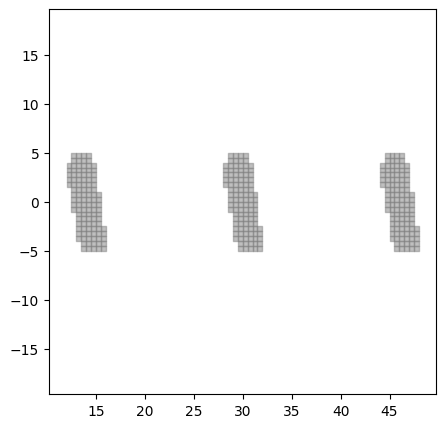

--------------------------------------------------
label: VentHole Chromosome_467: ['CircleShape_267', 'CornerTransformation_213']
predict: (0.2898431842890785, 373.74591290000006, 457.39121569999986)
biased_fitness: 0.6086834240529007, fitness: 0.6958825141092152
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


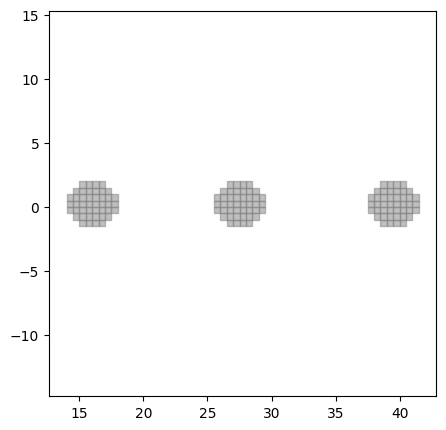

--------------------------------------------------
label: VentHole Chromosome_384: ['CircleShape_219', 'CircularStrictTransformation_409']
predict: (0.28934011581555996, 372.83238089999975, 457.08329919999983)
biased_fitness: 0.6209098756821619, fitness: 0.7070204413444023
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


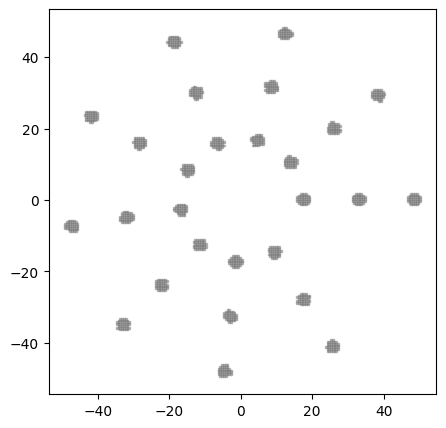

--------------------------------------------------
label: VentHole Chromosome_245: ['RayShape_449', 'CircularStrictTransformation_100']
predict: (0.2924150389646716, 373.13915859999986, 457.3861512)
biased_fitness: 0.5757213590945984, fitness: 0.6732230613532849
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


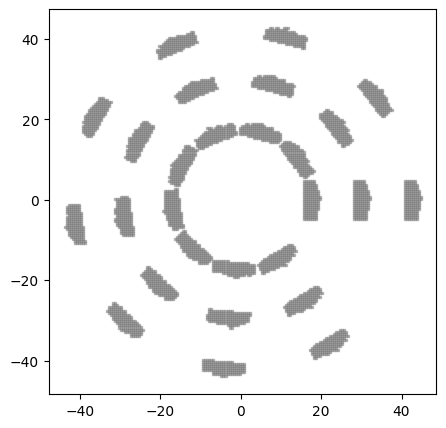

--------------------------------------------------
label: VentHole Chromosome_309: ['DonutShape_341', 'GridStrictTransformation_467']
predict: (0.2924393510468959, 372.74198090000004, 456.43383459999984)
biased_fitness: 0.5792715116434575, fitness: 0.6797274120310416
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


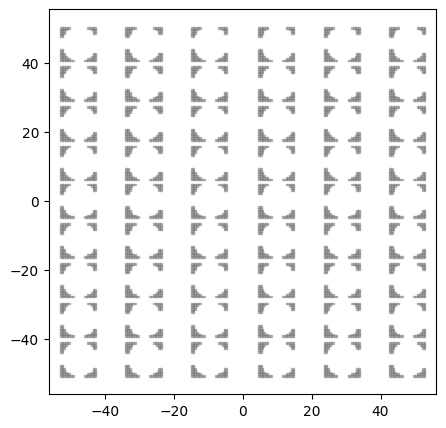

--------------------------------------------------
label: VentHole Chromosome_431: ['CircleShape_105', 'CornerTransformation_344']
predict: (0.288548865850381, 373.47581789999987, 457.1720147999999)
biased_fitness: 0.6285927589946672, fitness: 0.7112721779961914
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


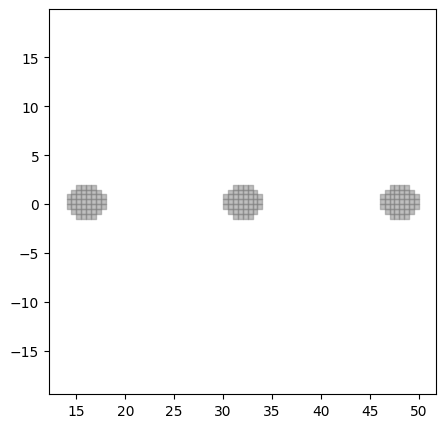

--------------------------------------------------
label: VentHole Chromosome_105: ['CircleShape_431', 'CircularStrictTransformation_463']
predict: (0.2901596577734553, 373.4700600000001, 457.16939669999977)
biased_fitness: 0.6060756977716255, fitness: 0.6952061387654475
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


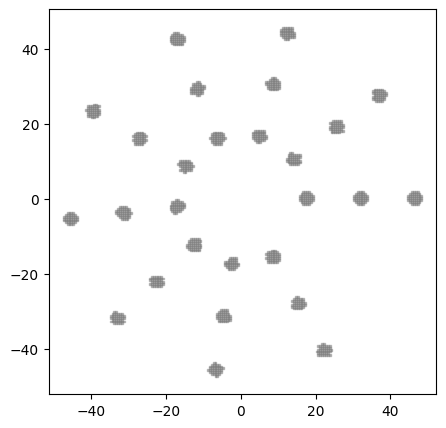

--------------------------------------------------
label: VentHole Chromosome_245: ['CircleShape_449', 'CircularStrictTransformation_463']
predict: (0.28940358474629724, 373.26883680000014, 457.1576996)
biased_fitness: 0.6176902303518378, fitness: 0.7038314705370268
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


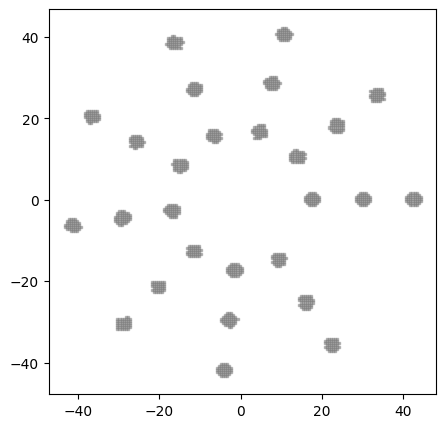

--------------------------------------------------
label: VentHole Chromosome_267: ['DonutShape_491', 'CornerTransformation_152']
predict: (0.2929578586965831, 373.46644329999987, 462.5406679999999)
biased_fitness: 0.5561764257478374, fitness: 0.64038585653417
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


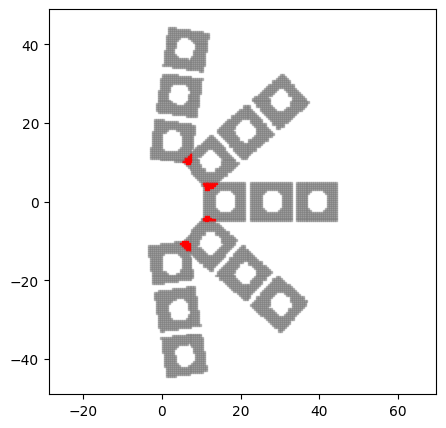

--------------------------------------------------
label: VentHole Chromosome_463: ['HoleShape_449', 'GridStrictTransformation_430']
predict: (0.2976784974905087, 374.73309119999993, 463.1980958000003)
biased_fitness: 0.4824393875328781, fitness: 0.5835590900949119
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ dx: 6.341189900672257, dy: 5.153642441096798, ]


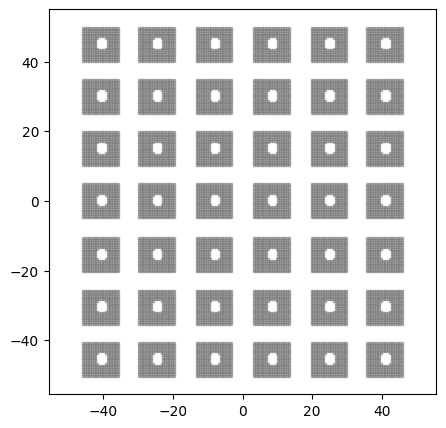

--------------------------------------------------
label: VentHole Chromosome_430: ['CircleShape_222', 'CornerTransformation_105']
predict: (0.28814299313402003, 373.0948874, 456.8825365999998)
biased_fitness: 0.6367585859237198, fitness: 0.7186829486598005
shape parameter:
parameter_list: [ r: 1.6217391963064922, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


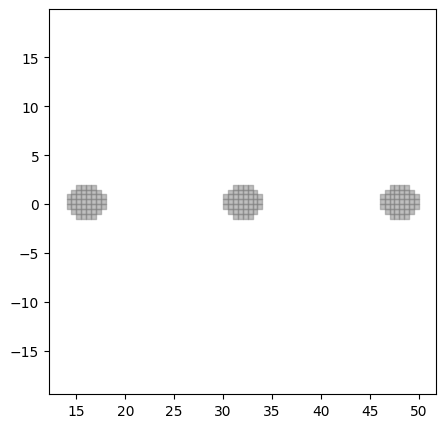

--------------------------------------------------
label: VentHole Chromosome_467: ['DoubleParabolicShape_463', 'CornerTransformation_62']
predict: (0.2881057431148841, 373.2278003999999, 458.21394519999996)
biased_fitness: 0.6339527039916225, fitness: 0.7117338408511592
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


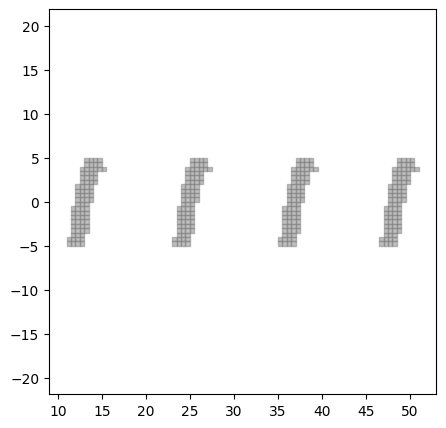

--------------------------------------------------
label: VentHole Chromosome_409: ['TrapezoidShape_322', 'CornerTransformation_409']
predict: (0.2887868860681597, 373.2599192, 456.15736150000004)
biased_fitness: 0.6283692760457636, fitness: 0.7150447358184024
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


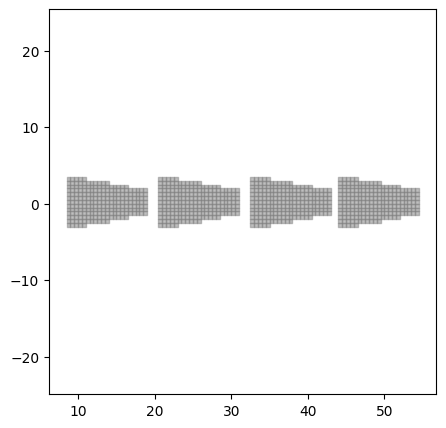

--------------------------------------------------
label: VentHole Chromosome_467: ['DonutShape_192', 'CircularStrictTransformation_93']
predict: (0.29617707871424237, 373.9453026999999, 459.02633569999955)
biased_fitness: 0.515741713100608, fitness: 0.6233710208575789
shape parameter:
parameter_list: [ r_inner: 2.5011392051815418, r_outer: 8.228028224630615, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


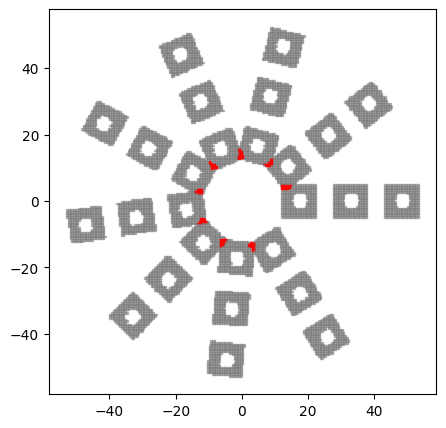

--------------------------------------------------
label: VentHole Chromosome_430: ['CircleShape_362', 'CornerTransformation_171']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ r: 1.6217391963064922, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


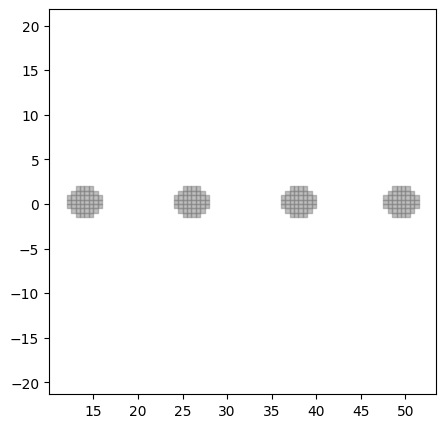

--------------------------------------------------
label: VentHole Chromosome_171: ['TrapezoidShape_105', 'CornerTransformation_384']
predict: (0.28882805521817145, 373.1618834999999, 456.2085116999999)
biased_fitness: 0.6281807860456002, fitness: 0.7148674718182864
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


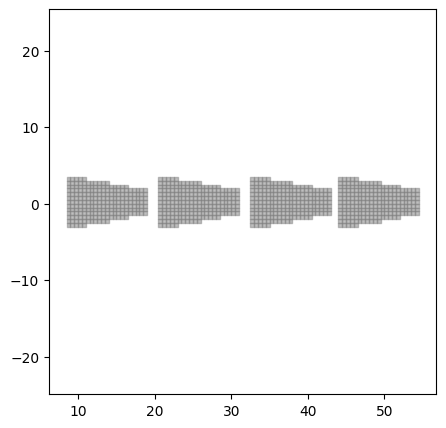

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_434', 'GridStrictTransformation_100']
predict: (0.29089076112974466, 373.4653803999999, 454.5291523000001)
biased_fitness: 0.601144137583575, fitness: 0.7011197252025534
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


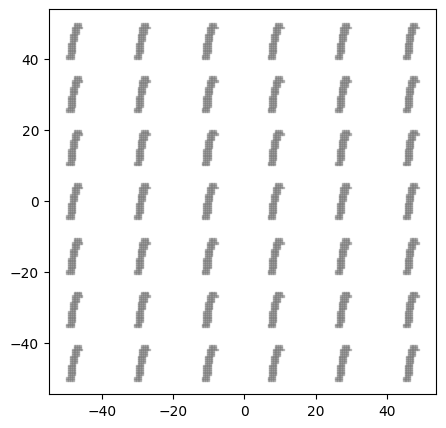

--------------------------------------------------
label: VentHole Chromosome_384: ['RayShape_409', 'CircularStrictTransformation_344']
predict: (0.29265518409113644, 372.8592544999998, 457.10246069999994)
biased_fitness: 0.5743262288240908, fitness: 0.6736395830886368
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


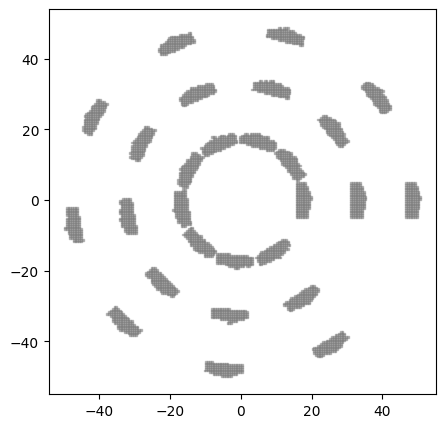

--------------------------------------------------
label: VentHole Chromosome_10: ['DonutShape_93', 'CornerTransformation_324']
predict: (0.28909165463485165, 373.4575896000001, 456.3070428999998)
biased_fitness: 0.6228148013120767, fitness: 0.7102602911514839
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


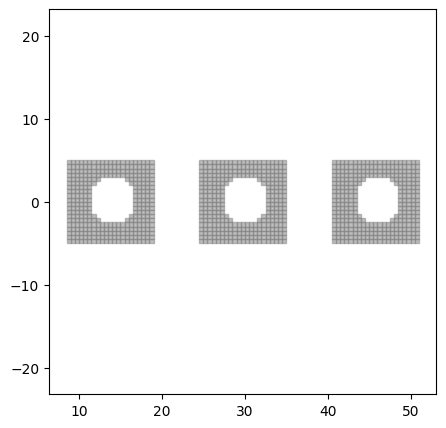

--------------------------------------------------
label: VentHole Chromosome_267: ['CircleShape_234', 'CircularStrictTransformation_289']
predict: (0.28971664169306743, 373.10771510000006, 457.8089237000001)
biased_fitness: 0.6128105933970552, fitness: 0.6982503890693247
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


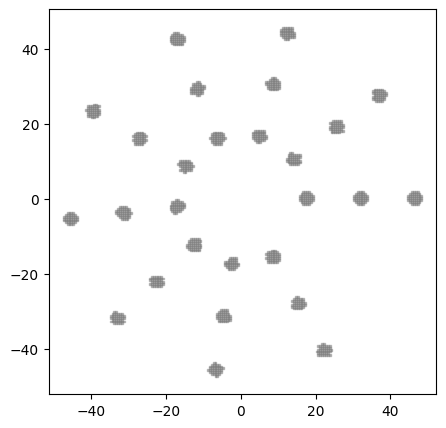

--------------------------------------------------
label: VentHole Chromosome_105: ['TriangleShape_409', 'CircularStrictTransformation_344']
predict: (0.2908565683736355, 373.2065250000001, 457.09018289999983)
biased_fitness: 0.5977950519691028, fitness: 0.6899507767636452
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


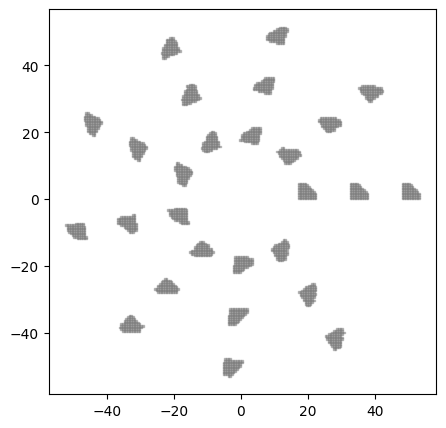

--------------------------------------------------
label: VentHole Chromosome_362: ['DonutShape_449', 'GridStrictTransformation_204']
predict: (0.29687875545200915, 373.9874946999999, 458.75553020000007)
biased_fitness: 0.5062488897718722, fitness: 0.6174973209799086
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


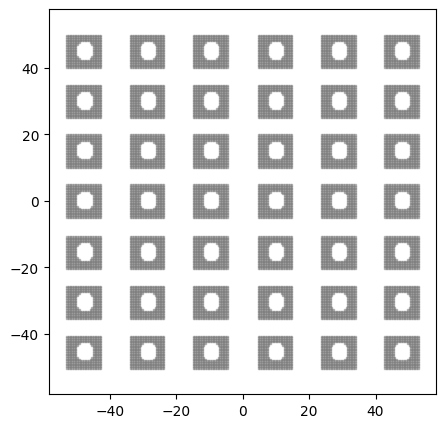

--------------------------------------------------
label: VentHole Chromosome_171: ['HoleShape_467', 'GridStrictTransformation_255']
predict: (0.2966913748232489, 374.4116612, 464.4516675999998)
biased_fitness: 0.49535911127451526, fitness: 0.5887696077675116
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


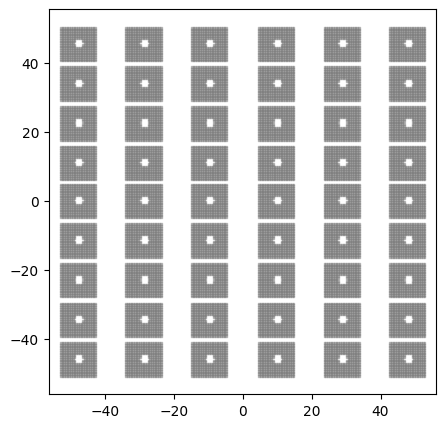

--------------------------------------------------
label: VentHole Chromosome_331: ['TriangleShape_222', 'CircularStrictTransformation_192']
predict: (0.29105890875338325, 373.5420548, 457.86070119999965)
biased_fitness: 0.5917436010526349, fitness: 0.6823971324661691
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


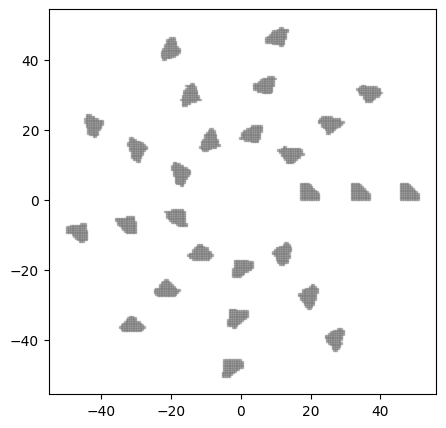

--------------------------------------------------
label: VentHole Chromosome_409: ['TriangleShape_331', 'GridStrictTransformation_449']
predict: (0.29154036107951087, 372.8998054, 456.8227306999999)
biased_fitness: 0.590290456486848, fitness: 0.6859837087048918
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


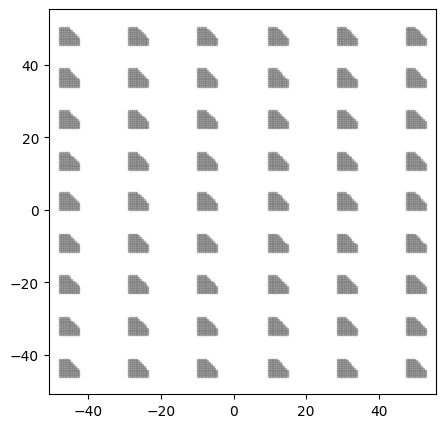

--------------------------------------------------
label: VentHole Chromosome_245: ['DonutShape_344', 'CornerTransformation_267']
predict: (0.28882296871953717, 373.40962699999994, 457.8746232999999)
biased_fitness: 0.6236810563264801, fitness: 0.7053490613046292
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


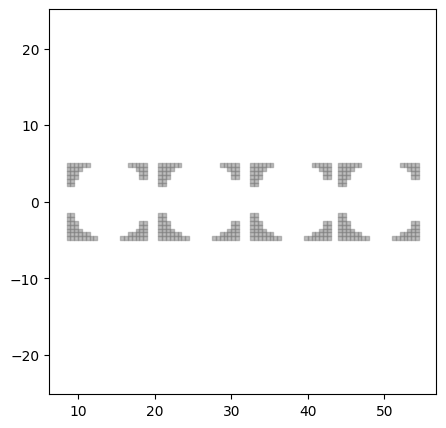

--------------------------------------------------
label: VentHole Chromosome_434: ['TrapezoidShape_431', 'CornerTransformation_260']
predict: (0.28882805521817145, 373.1618834999999, 456.2085116999999)
biased_fitness: 0.6281807860456002, fitness: 0.7148674718182864
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


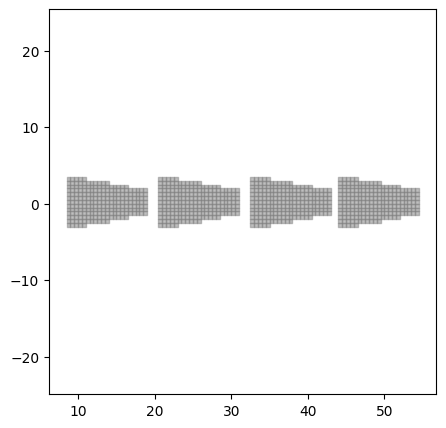

--------------------------------------------------
label: VentHole Chromosome_449: ['RayShape_245', 'GridStrictTransformation_491']
predict: (0.2898023489537582, 373.2749640000002, 457.0505285)
biased_fitness: 0.6122912376473838, fitness: 0.7003490479624168
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


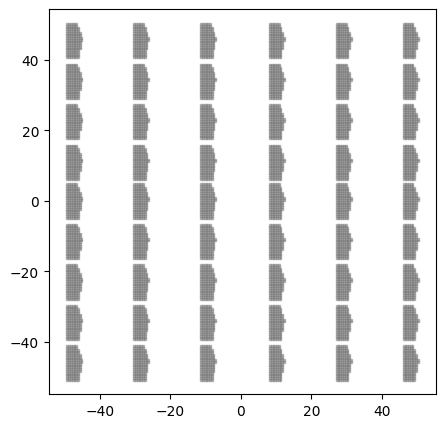

--------------------------------------------------
label: VentHole Chromosome_105: ['TrapezoidShape_434', 'CornerTransformation_267']
predict: (0.2885642164150526, 373.6096281999999, 457.58827269999966)
biased_fitness: 0.6268762837892647, fitness: 0.7083683313494761
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


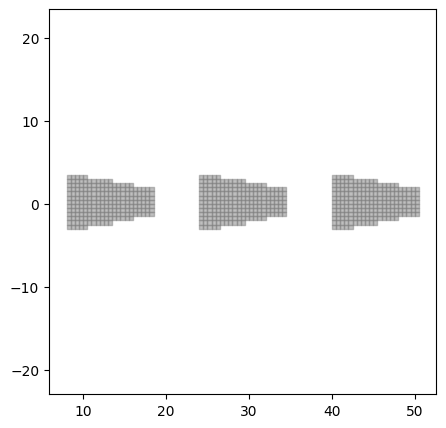

--------------------------------------------------
label: VentHole Chromosome_376: ['DoubleParabolicShape_434', 'CornerTransformation_409']
predict: (0.28808315385680006, 373.13408300000003, 457.294331)
biased_fitness: 0.6365767690047989, fitness: 0.7170263914319991
shape parameter:
parameter_list: [ lower_coefficient: 1.735834911474334, upper_coefficient: 2.3982536536445167, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


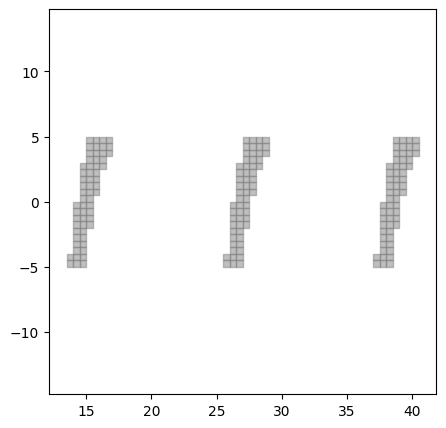

--------------------------------------------------
label: VentHole Chromosome_341: ['DonutShape_62', 'GridStrictTransformation_309']
predict: (0.292151530574003, 372.7382786, 456.6567162)
biased_fitness: 0.5828737465639577, fitness: 0.6815097202599698
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


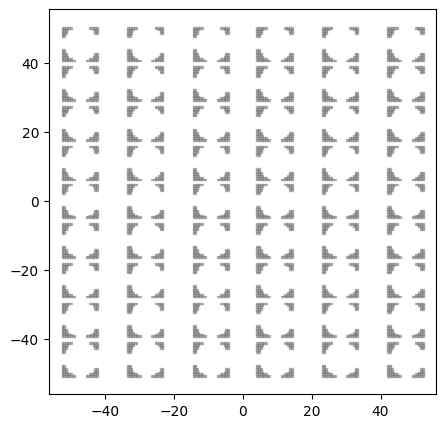

--------------------------------------------------
label: VentHole Chromosome_409: ['DoubleParabolicShape_409', 'CircularStrictTransformation_100']
predict: (0.28846912156709825, 372.9305129000001, 457.7720746)
biased_fitness: 0.6312355843606239, fitness: 0.7117958468290169
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


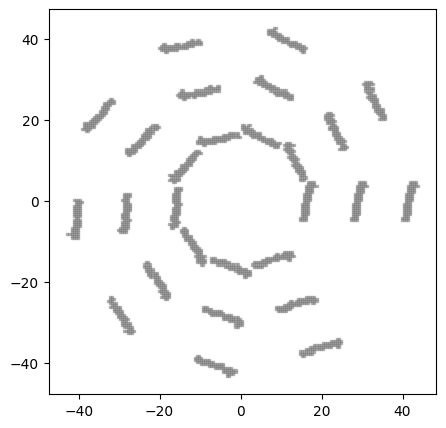

--------------------------------------------------
label: VentHole Chromosome_362: ['TrapezoidShape_409', 'CornerTransformation_344']
predict: (0.29174064481106843, 374.2781990000001, 460.78635159999993)
biased_fitness: 0.5726672744450416, fitness: 0.6572707988893156
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


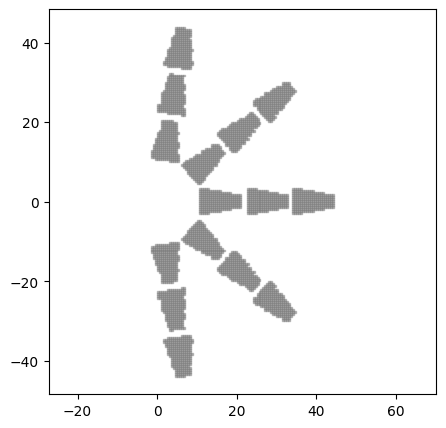

--------------------------------------------------
label: VentHole Chromosome_289: ['RayShape_149', 'CircularStrictTransformation_204']
predict: (0.2926601895478682, 373.0818649999999, 458.7202305000001)
biased_fitness: 0.5699075603298452, fitness: 0.6643876270213177
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


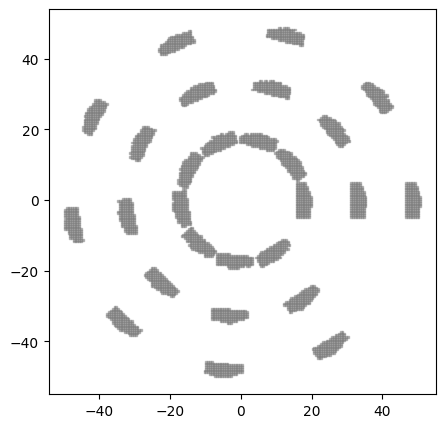

--------------------------------------------------
label: VentHole Chromosome_267: ['DonutShape_495', 'CircularStrictTransformation_431']
predict: (0.2959202967002179, 373.27526170000004, 461.06829569999985)
biased_fitness: 0.5186029462969491, fitness: 0.6190792459978213
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


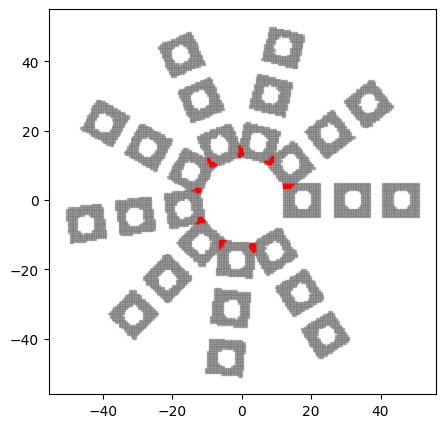

--------------------------------------------------
label: VentHole Chromosome_149: ['HoleShape_491', 'CornerTransformation_171']
predict: (0.2893597949293205, 373.19501940000004, 458.03334739999985)
biased_fitness: 0.6169210791895128, fitness: 0.7002602167067953
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


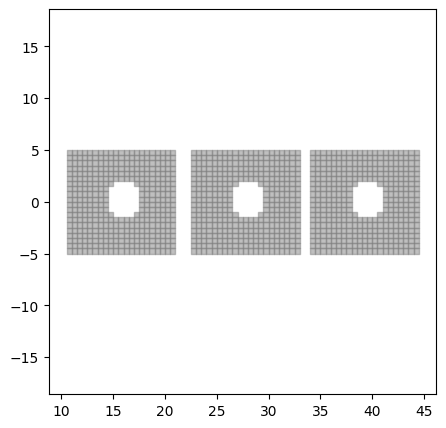

--------------------------------------------------
label: VentHole Chromosome_260: ['CircleShape_10', 'CornerTransformation_10']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


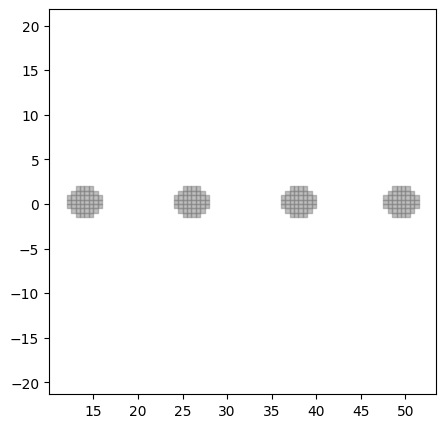

--------------------------------------------------
label: VentHole Chromosome_463: ['DonutShape_344', 'CircularStrictTransformation_100']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


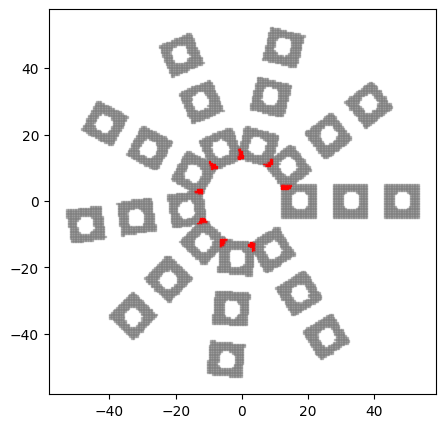

--------------------------------------------------
label: VentHole Chromosome_463: ['DoubleParabolicShape_463', 'GridStrictTransformation_434']
predict: (0.29131967553225113, 372.65362349999964, 457.26042369999993)
biased_fitness: 0.593735577648486, fitness: 0.6872330086774907
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ dx: 6.341189900672257, dy: 5.153642441096798, ]


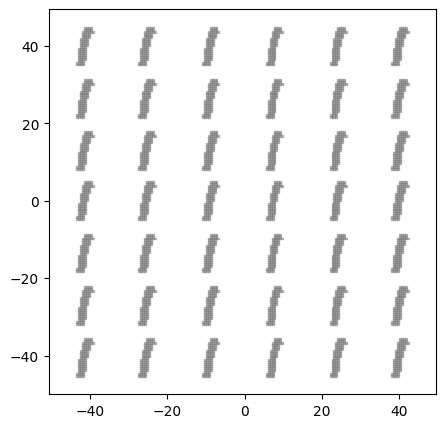

--------------------------------------------------
label: VentHole Chromosome_234: ['DonutShape_234', 'CornerTransformation_434']
predict: (0.28825820301360605, 373.3029507999999, 458.3494308)
biased_fitness: 0.6311715422095157, fitness: 0.7091560618639399
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 8.753633155259278, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


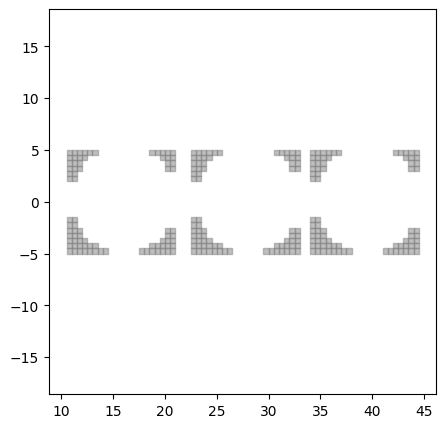

--------------------------------------------------
label: VentHole Chromosome_171: ['RayShape_309', 'CircularStrictTransformation_449']
predict: (0.2930644623609384, 373.1835261, 459.3839983999998)
biased_fitness: 0.5624118996468624, fitness: 0.6565177538906167
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


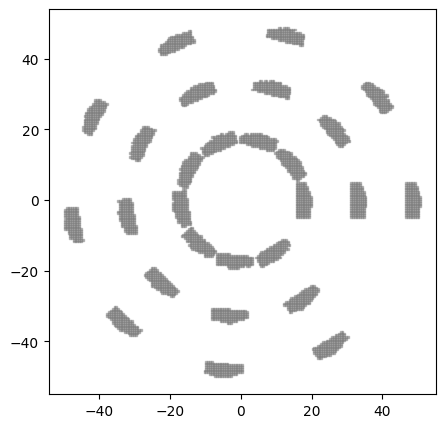

--------------------------------------------------
label: VentHole Chromosome_449: ['RayShape_309', 'CornerTransformation_2']
predict: (0.2905787029190374, 373.0845118, 458.7465319)
biased_fitness: 0.5989825363334761, fitness: 0.6850577523096258
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


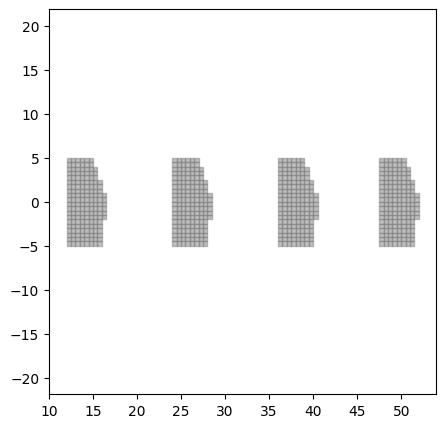

--------------------------------------------------
label: VentHole Chromosome_391: ['WingShape_171', 'CircularStrictTransformation_105']
predict: (0.290460379664629, 372.88763009999997, 457.51086439999995)
biased_fitness: 0.604094805395194, fitness: 0.6934037308537102
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


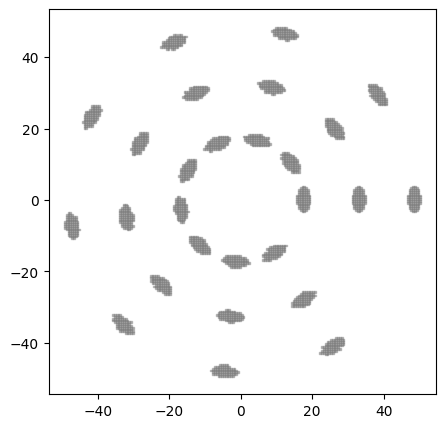

--------------------------------------------------
label: VentHole Chromosome_431: ['HoleShape_171', 'GridStrictTransformation_171']
predict: (0.29787499095254244, 374.2285993, 456.57652830000023)
biased_fitness: 0.4954540735644053, fitness: 0.6172244524745744
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


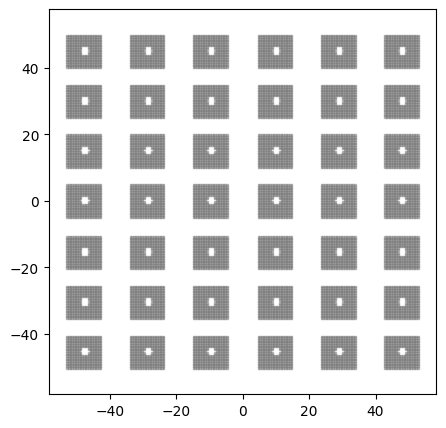

--------------------------------------------------
label: VentHole Chromosome_434: ['CircleShape_463', 'GridStrictTransformation_495']
predict: (0.2900967395966576, 373.0392230000002, 456.32077319999985)
biased_fitness: 0.6108079842467926, fitness: 0.7022326230334235
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


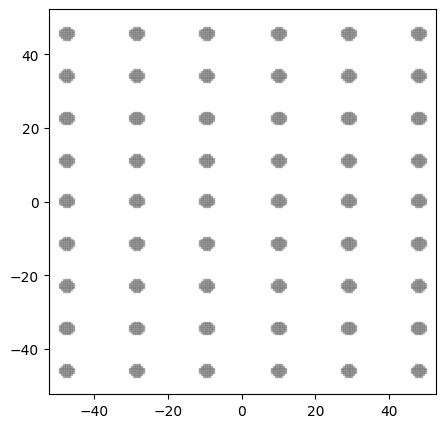

--------------------------------------------------
label: VentHole Chromosome_100: ['DonutShape_491', 'CircularStrictTransformation_10']
predict: (0.2967123819289301, 374.2387724999999, 464.0362782999996)
biased_fitness: 0.49676023389497925, fitness: 0.591500926710701
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


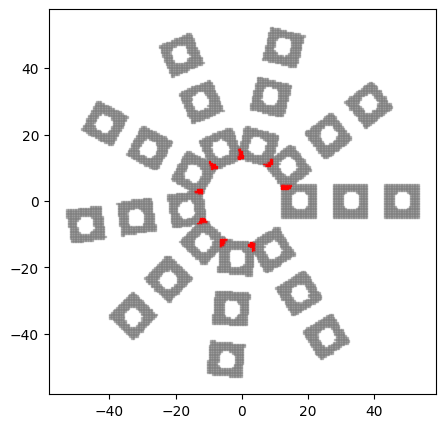

--------------------------------------------------
label: VentHole Chromosome_260: ['HoleShape_324', 'CornerTransformation_324']
predict: (0.2889078251907784, 373.52515269999986, 458.9284835999999)
biased_fitness: 0.6198077166291032, fitness: 0.6986535665922172
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


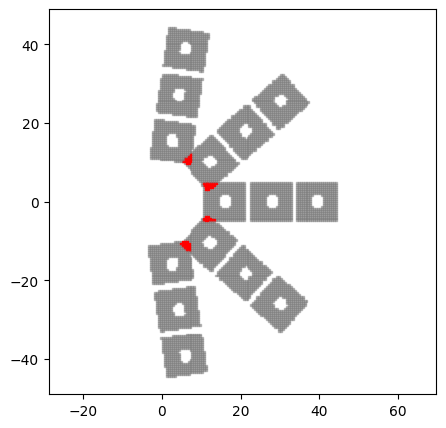

--------------------------------------------------
label: VentHole Chromosome_491: ['DonutShape_260', 'CircularStrictTransformation_219']
predict: (0.29461763272881836, 373.2607292, 461.2594287)
biased_fitness: 0.5365306383965427, fitness: 0.6312228832118162
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.758798442972855, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


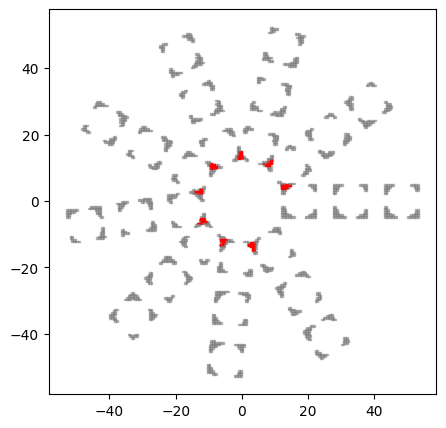

--------------------------------------------------
label: VentHole Chromosome_204: ['TriangleShape_289', 'CornerTransformation_418']
predict: (0.2893741739632545, 373.571266, 455.7964117999998)
biased_fitness: 0.6193124109144375, fitness: 0.709419871367456
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


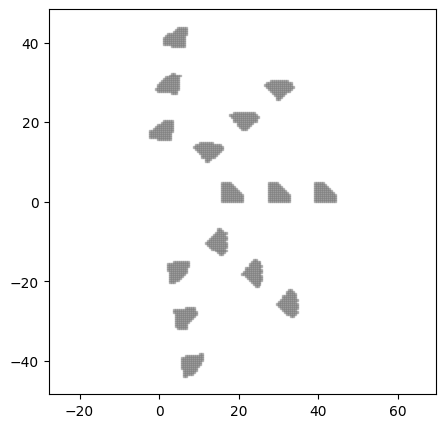

--------------------------------------------------
label: VentHole Chromosome_267: ['RayShape_267', 'CornerTransformation_221']
predict: (0.2887712936913287, 373.34348420000003, 457.81331309999985)
biased_fitness: 0.6248578411213982, fitness: 0.7065030765867135
shape parameter:
parameter_list: [ upper_slope: 1.0747880767010933, nose_point: 1.19259352592516, lower_coefficient: 2.9196450121786457, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


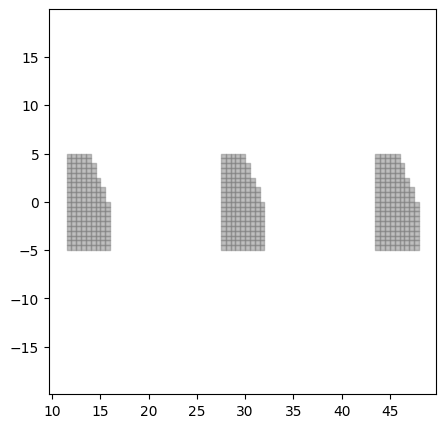

--------------------------------------------------
label: VentHole Chromosome_100: ['DoubleParabolicShape_171', 'GridStrictTransformation_105']
predict: (0.2906813218763604, 373.8661988, 456.99538959999995)
biased_fitness: 0.5971397205309541, fitness: 0.6888788392363959
shape parameter:
parameter_list: [ lower_coefficient: 1.460002097499781, upper_coefficient: 2.18899758081393, lower_y-intercept: 3.873649252838036, upper_y-intercept_from_lower_y: 1.8892295985641492, lower_x_trans: 2.346330824966963, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


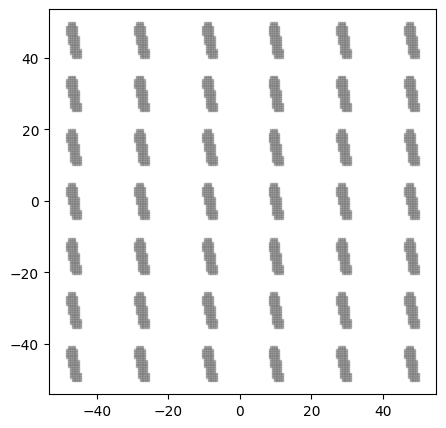

--------------------------------------------------
label: VentHole Chromosome_344: ['DonutShape_362', 'CircularStrictTransformation_171']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


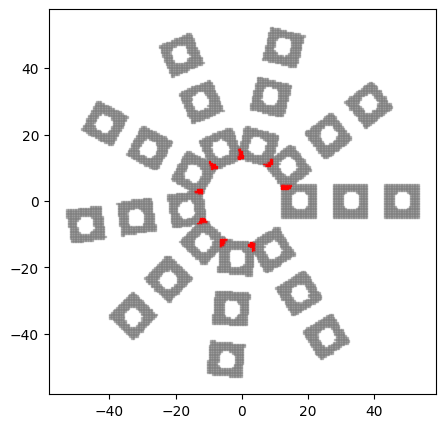

--------------------------------------------------
label: VentHole Chromosome_324: ['WingShape_208', 'CornerTransformation_331']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


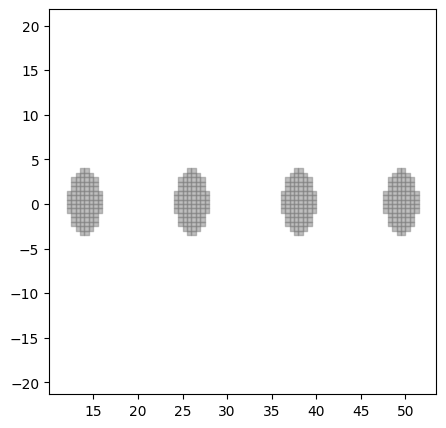

--------------------------------------------------
label: VentHole Chromosome_260: ['DonutShape_418', 'CornerTransformation_434']
predict: (0.28988599947144533, 373.09026109999996, 456.10806240000005)
biased_fitness: 0.6139285770997652, fitness: 0.7051483877855464
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


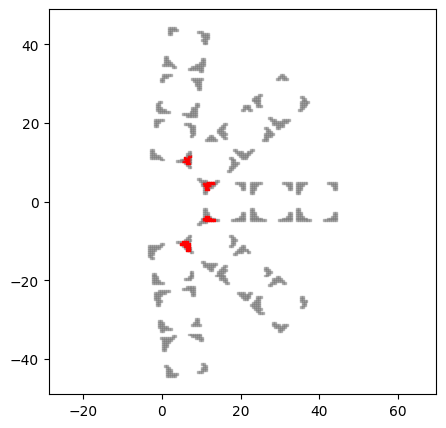

--------------------------------------------------
label: VentHole Chromosome_171: ['DonutShape_62', 'CornerTransformation_204']
predict: (0.2932505897052695, 373.95414529999994, 463.2676723999997)
biased_fitness: 0.5481856728262277, fitness: 0.6313850144473067
shape parameter:
parameter_list: [ r_inner: 2.5011392051815418, r_outer: 8.546401441938373, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


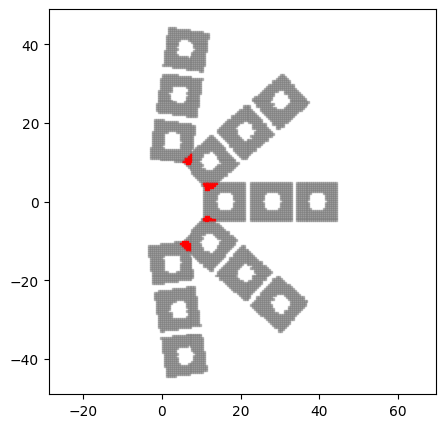

--------------------------------------------------
label: VentHole Chromosome_344: ['DonutShape_62', 'CircularStrictTransformation_171']
predict: (0.29088385081168533, 373.3543912, 458.3254195)
biased_fitness: 0.5942032936364052, fitness: 0.6827624383831465
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


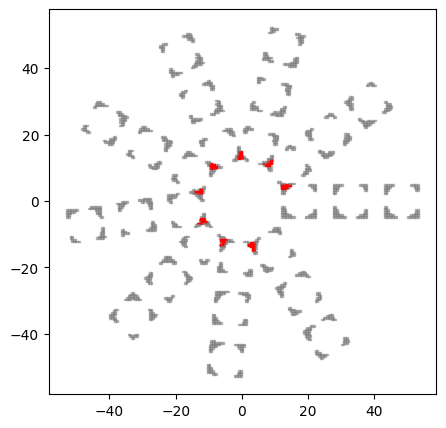

--------------------------------------------------
label: VentHole Chromosome_413: ['WingShape_221', 'CircularStrictTransformation_289']
predict: (0.29132178042728807, 373.26600370000006, 458.07929090000005)
biased_fitness: 0.5890064737179665, fitness: 0.6800557227271188
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


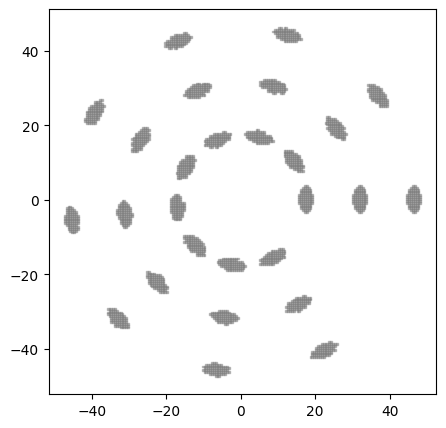

--------------------------------------------------
label: VentHole Chromosome_105: ['RayShape_149', 'GridStrictTransformation_434']
predict: (0.2914787957548417, 373.0111752, 456.78230019999995)
biased_fitness: 0.590676383032216, fitness: 0.686244665451583
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


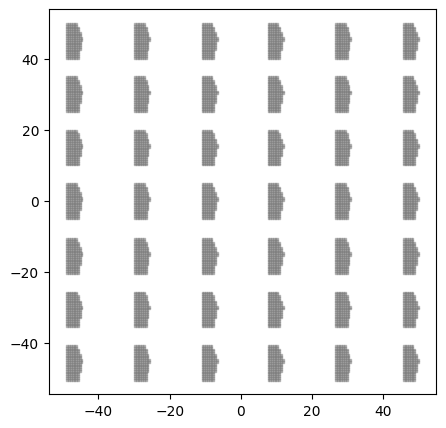

--------------------------------------------------
label: VentHole Chromosome_221: ['HoleShape_149', 'CircularStrictTransformation_289']
predict: (0.29598555687187167, 373.39952470000003, 459.6109176999999)
biased_fitness: 0.5199827448937966, fitness: 0.6250922192812836
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


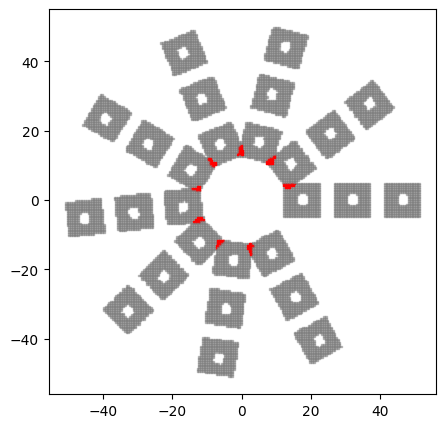

--------------------------------------------------
label: VentHole Chromosome_309: ['RayShape_2', 'CircularStrictTransformation_260']
predict: (0.29270474769760346, 373.25239649999986, 456.65734169999996)
biased_fitness: 0.5725568663335522, fitness: 0.6734038320239661
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


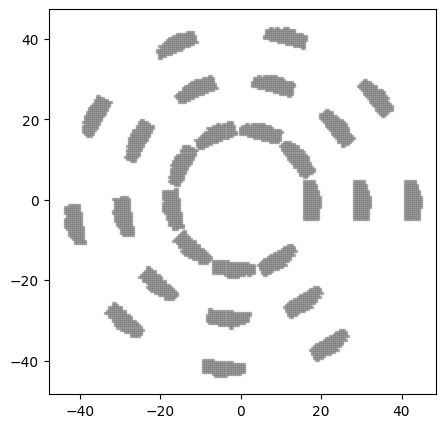

--------------------------------------------------
label: VentHole Chromosome_449: ['DonutShape_344', 'CornerTransformation_105']
predict: (0.2892660148957349, 373.5720229000001, 455.14852959999973)
biased_fitness: 0.6221186177597114, fitness: 0.7137370885426518
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


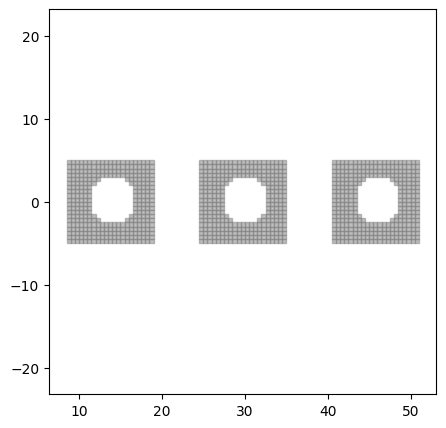

--------------------------------------------------
label: VentHole Chromosome_10: ['DonutShape_192', 'CircularStrictTransformation_418']
predict: (0.2970256438461427, 373.3662897, 463.042639)
biased_fitness: 0.49872425965400186, fitness: 0.5976989180385728
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


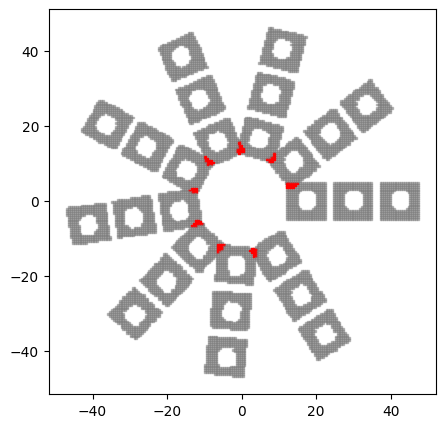

--------------------------------------------------
label: VentHole Chromosome_432: ['RayShape_322', 'GridStrictTransformation_245']
predict: (0.28980743227785544, 373.49375820000006, 456.1544388)
biased_fitness: 0.6129182795100235, fitness: 0.7036846922214454
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


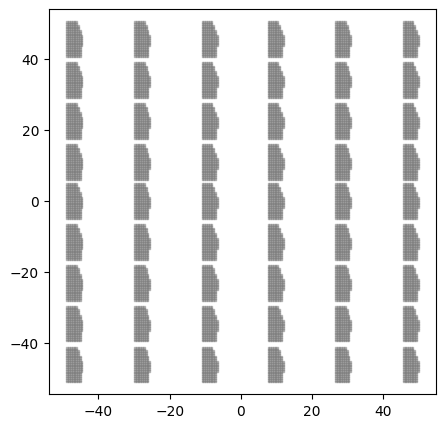

--------------------------------------------------
label: VentHole Chromosome_431: ['WingShape_234', 'CornerTransformation_255']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


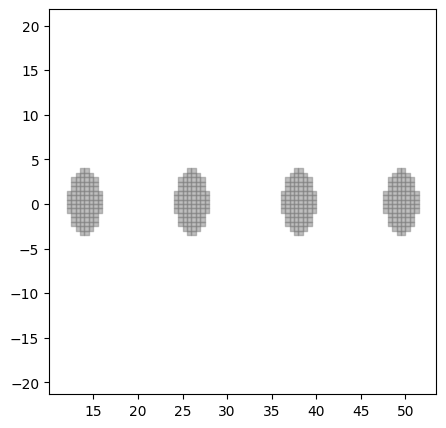

--------------------------------------------------
label: VentHole Chromosome_234: ['TrapezoidShape_413', 'CornerTransformation_234']
predict: (0.29174064481106843, 374.2781990000001, 460.78635159999993)
biased_fitness: 0.5726672744450416, fitness: 0.6572707988893156
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 3.0, ]


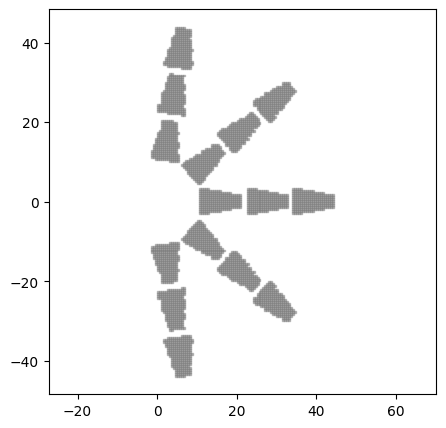

--------------------------------------------------
label: VentHole Chromosome_222: ['TriangleShape_467', 'CircularStrictTransformation_222']
predict: (0.2915017160380988, 373.2991019000001, 458.1313092999998)
biased_fitness: 0.5862178473666162, fitness: 0.6778307836190121
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


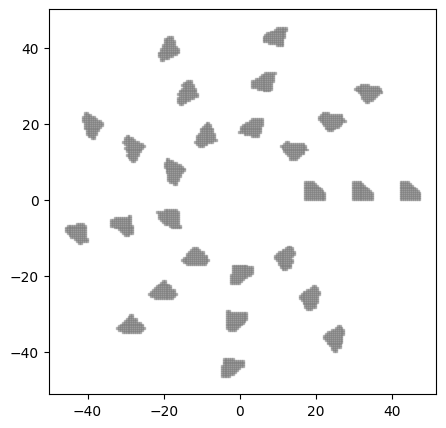

--------------------------------------------------
label: VentHole Chromosome_431: ['DonutShape_467', 'CircularStrictTransformation_467']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


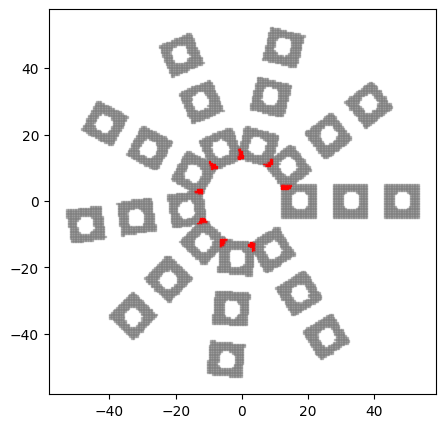

--------------------------------------------------
label: VentHole Chromosome_463: ['DonutShape_219', 'CircularStrictTransformation_463']
predict: (0.2919721871186307, 373.46758640000013, 458.7446580999999)
biased_fitness: 0.5775621321391694, fitness: 0.6692169063136926
shape parameter:
parameter_list: [ r_inner: 4.888251718467185, r_outer: 9.366318393507276, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


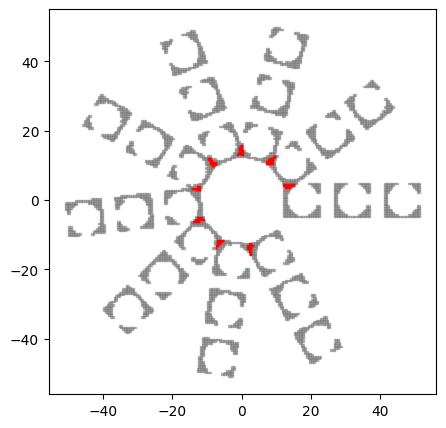

--------------------------------------------------
label: VentHole Chromosome_495: ['CircleShape_289', 'CornerTransformation_491']
predict: (0.2890169743286002, 373.1888401, 457.42378829999996)
biased_fitness: 0.6229705822995975, fitness: 0.7067671147139983
shape parameter:
parameter_list: [ r: 1.6217391963064922, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


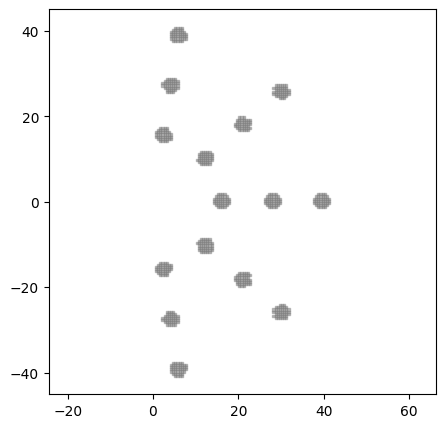

--------------------------------------------------
label: VentHole Chromosome_431: ['DonutShape_171', 'CircularStrictTransformation_467']
predict: (0.2959237133190218, 374.4619941, 462.5602622999996)
biased_fitness: 0.5096375184336955, fitness: 0.605651584809784
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 4.27255042283659, phi: 0.7853981633974483, ]


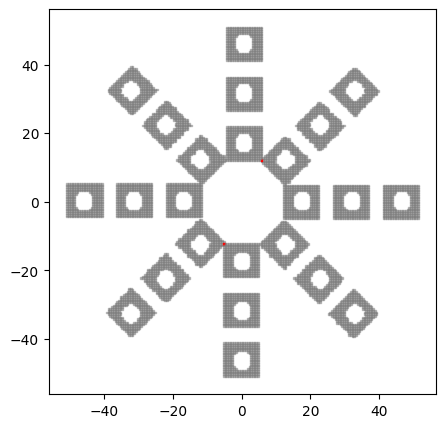

--------------------------------------------------
label: VentHole Chromosome_467: ['DonutShape_206', 'CornerTransformation_222']
predict: (0.2949268581724884, 374.31993159999996, 460.7859187999997)
biased_fitness: 0.5278524899851627, fitness: 0.6252021662751173
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


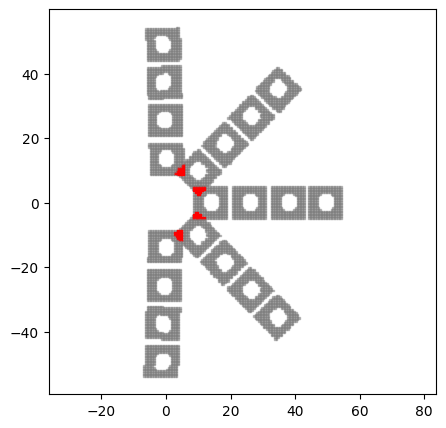

--------------------------------------------------
label: VentHole Chromosome_171: ['RayShape_449', 'CornerTransformation_255']
predict: (0.28855869993046257, 373.3364408, 457.0663807999999)
biased_fitness: 0.6293632353735241, fitness: 0.7123988926953748
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


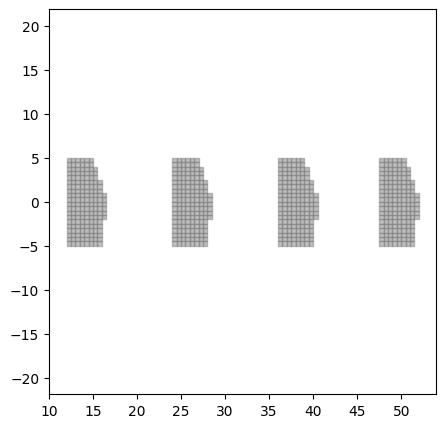

--------------------------------------------------
label: VentHole Chromosome_385: ['WingShape_431', 'CircularStrictTransformation_467']
predict: (0.2906830968690648, 372.7576011999999, 456.0212836)
biased_fitness: 0.6046060706330932, fitness: 0.6992746073093524
shape parameter:
parameter_list: [ c: 3.660024258636451, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.4487989505128276, ]


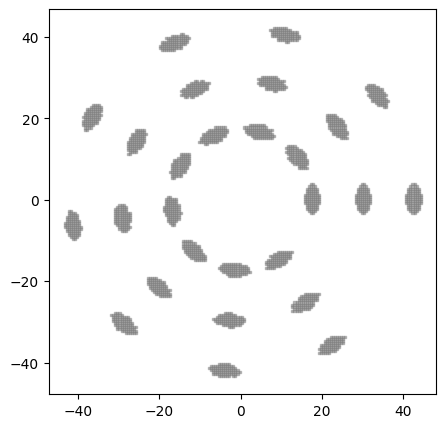

--------------------------------------------------
label: VentHole Chromosome_467: ['WingShape_204', 'GridStrictTransformation_409']
predict: (0.2902154170544371, 372.8422256, 455.4754454999999)
biased_fitness: 0.6118221422378807, fitness: 0.7062574739556293
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


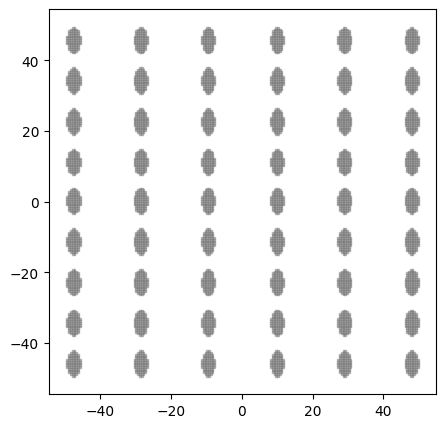

--------------------------------------------------
label: VentHole Chromosome_245: ['TriangleShape_171', 'CornerTransformation_149']
predict: (0.28841027890661364, 373.1988210999999, 456.12517629999985)
biased_fitness: 0.6340116372074097, fitness: 0.7192772239338647
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


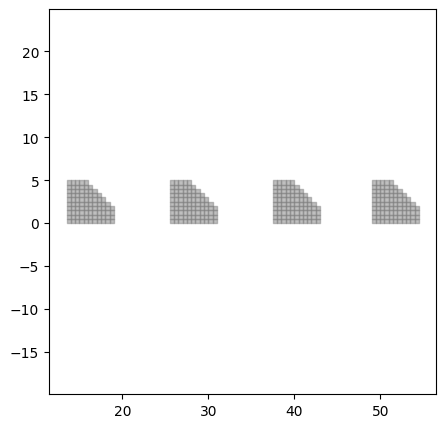

--------------------------------------------------
label: VentHole Chromosome_418: ['DonutShape_467', 'CornerTransformation_418']
predict: (0.28853265913512827, 373.1356461000001, 456.9848361000001)
biased_fitness: 0.6308948694082034, fitness: 0.7140709976487162
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


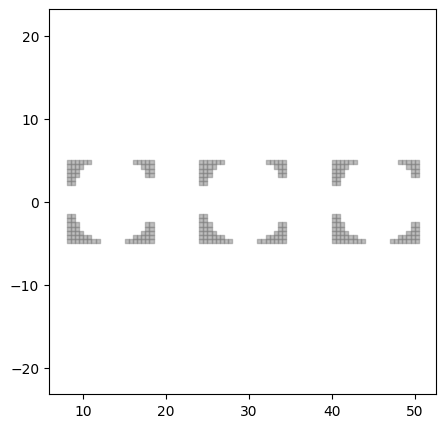

--------------------------------------------------
label: VentHole Chromosome_93: ['CircleShape_219', 'CornerTransformation_431']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


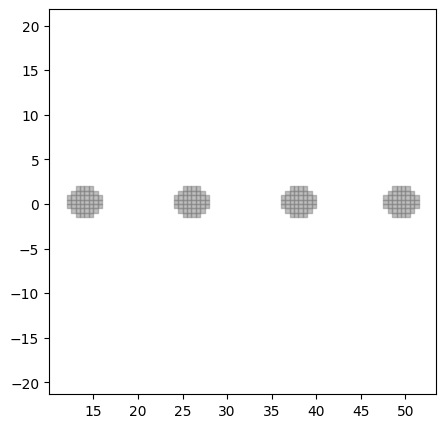

--------------------------------------------------
label: VentHole Chromosome_432: ['DonutShape_413', 'CornerTransformation_192']
predict: (0.28882296871953717, 373.40962699999994, 457.8746232999999)
biased_fitness: 0.6236810563264801, fitness: 0.7053490613046292
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


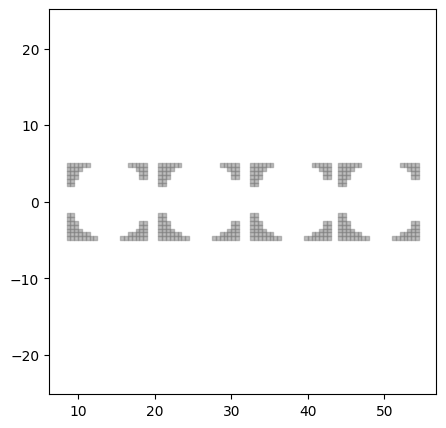

--------------------------------------------------
label: VentHole Chromosome_93: ['CircleShape_384', 'CircularStrictTransformation_432']
predict: (0.28940358474629724, 373.26883680000014, 457.1576996)
biased_fitness: 0.6176902303518378, fitness: 0.7038314705370268
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


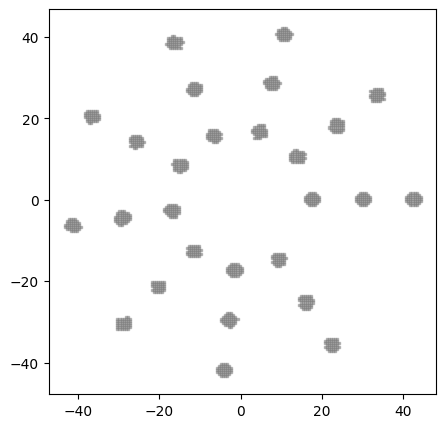

--------------------------------------------------
label: VentHole Chromosome_260: ['WingShape_467', 'CornerTransformation_309']
predict: (0.2893250941457062, 373.2173327, 457.19259159999984)
biased_fitness: 0.6189768352601137, fitness: 0.7046994370429389
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


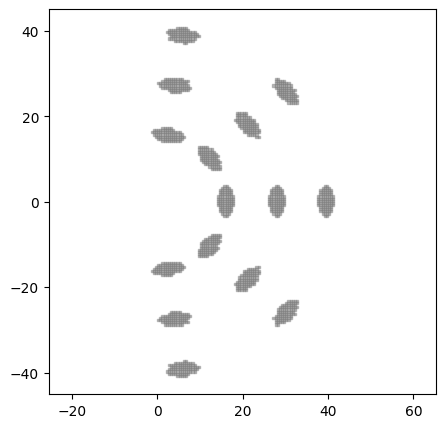

--------------------------------------------------
label: VentHole Chromosome_418: ['CircleShape_100', 'CircularStrictTransformation_204']
predict: (0.28940358474629724, 373.26883680000014, 457.1576996)
biased_fitness: 0.6176902303518378, fitness: 0.7038314705370268
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


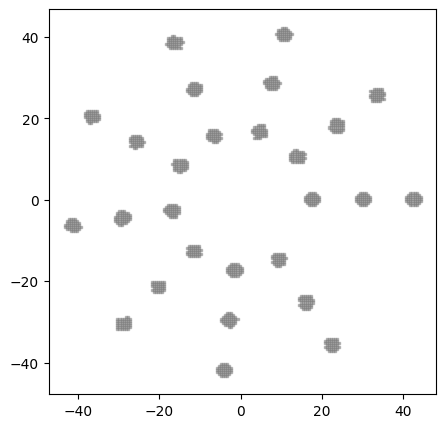

--------------------------------------------------
label: VentHole Chromosome_245: ['CircleShape_418', 'GridStrictTransformation_2']
predict: (0.2897684290668443, 373.1740067, 455.70745169999987)
biased_fitness: 0.6159570561641798, fitness: 0.7079084173315575
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


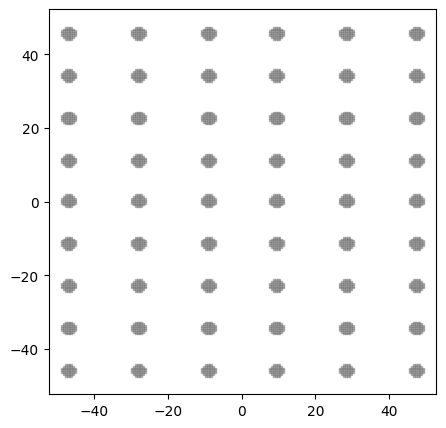

--------------------------------------------------
label: VentHole Chromosome_208: ['HoleShape_267', 'CornerTransformation_491']
predict: (0.2893597949293205, 373.19501940000004, 458.03334739999985)
biased_fitness: 0.6169210791895128, fitness: 0.7002602167067953
shape parameter:
parameter_list: [ hole_r: 2.665044850196659, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


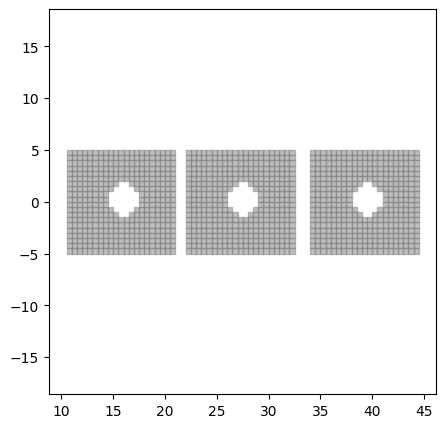

--------------------------------------------------
label: VentHole Chromosome_192: ['HoleShape_434', 'CircularStrictTransformation_222']
predict: (0.29725151138984485, 373.8696830999999, 463.04741839999997)
biased_fitness: 0.4930355882421724, fitness: 0.592899378601552
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


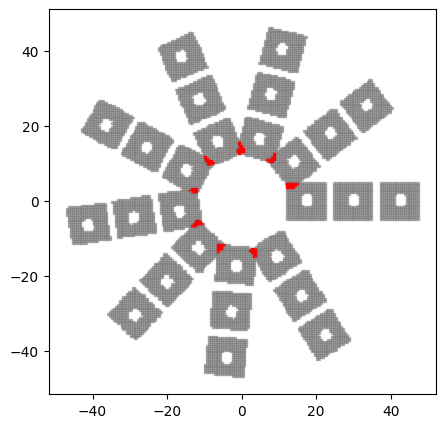

--------------------------------------------------
label: VentHole Chromosome_219: ['CircleShape_309', 'CircularStrictTransformation_491']
predict: (0.28934011581555996, 372.83238089999975, 457.08329919999983)
biased_fitness: 0.6209098756821619, fitness: 0.7070204413444023
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


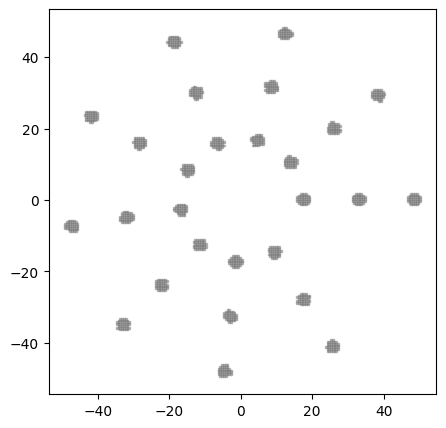

--------------------------------------------------
label: VentHole Chromosome_192: ['WingShape_204', 'CornerTransformation_255']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ c: 2.8055001063969134, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


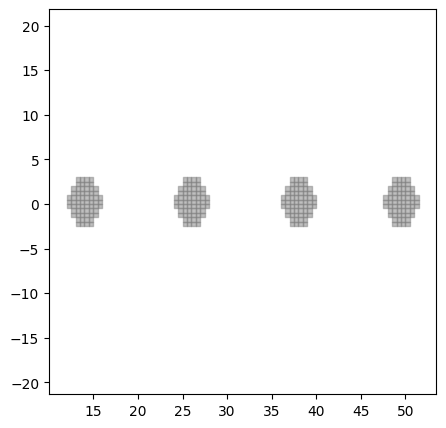

--------------------------------------------------
label: VentHole Chromosome_409: ['TrapezoidShape_100', 'GridStrictTransformation_430']
predict: (0.29581708844633936, 373.6953957, 460.93919469999986)
biased_fitness: 0.518205393851249, fitness: 0.6186561635366069
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


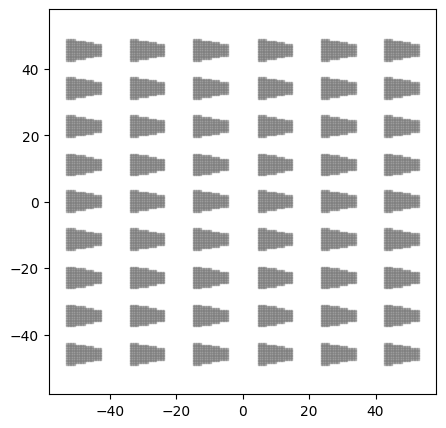

--------------------------------------------------
label: VentHole Chromosome_204: ['DoubleParabolicShape_171', 'CornerTransformation_260']
predict: (0.2881057431148841, 373.2278003999999, 458.21394519999996)
biased_fitness: 0.6339527039916225, fitness: 0.7117338408511592
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


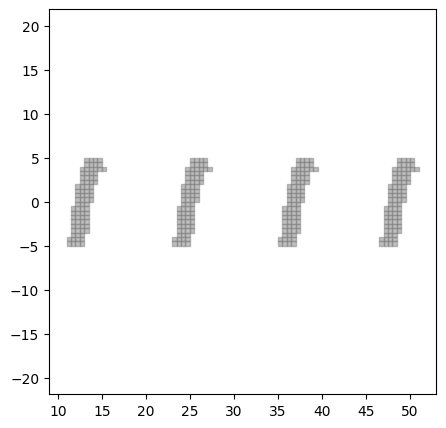

--------------------------------------------------
label: VentHole Chromosome_362: ['DonutShape_171', 'GridStrictTransformation_309']
predict: (0.2924393510468959, 372.74198090000004, 456.43383459999984)
biased_fitness: 0.5792715116434575, fitness: 0.6797274120310416
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


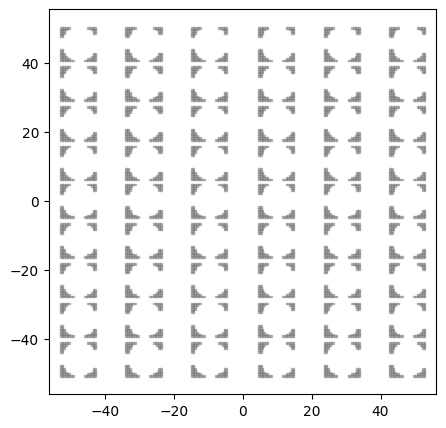

--------------------------------------------------
label: VentHole Chromosome_204: ['HoleShape_384', 'CornerTransformation_105']
predict: (0.2897569347684201, 373.52533580000005, 456.8714324999998)
biased_fitness: 0.6120333692421183, fitness: 0.7004468108157994
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


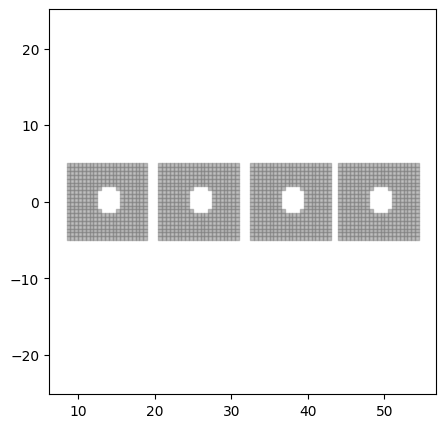

--------------------------------------------------
label: VentHole Chromosome_331: ['DonutShape_171', 'CornerTransformation_10']
predict: (0.28963712081841875, 373.5170013000002, 457.2558214999998)
biased_fitness: 0.6129836590421369, fitness: 0.6997646778158125
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


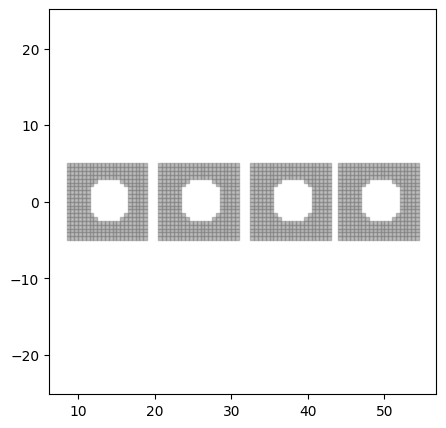

--------------------------------------------------
label: VentHole Chromosome_260: ['DoubleParabolicShape_100', 'CornerTransformation_322']
predict: (0.288602120199946, 373.1974056000001, 458.2765399)
biased_fitness: 0.6270302094007552, fitness: 0.7066090705005393
shape parameter:
parameter_list: [ lower_coefficient: 1.735834911474334, upper_coefficient: 2.3982536536445167, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


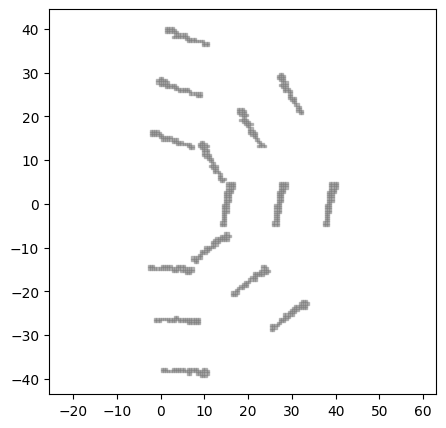

--------------------------------------------------
label: VentHole Chromosome_204: ['WingShape_204', 'CircularStrictTransformation_331']
predict: (0.29132178042728807, 373.26600370000006, 458.07929090000005)
biased_fitness: 0.5890064737179665, fitness: 0.6800557227271188
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 4.27255042283659, phi: 0.5711986642890533, ]


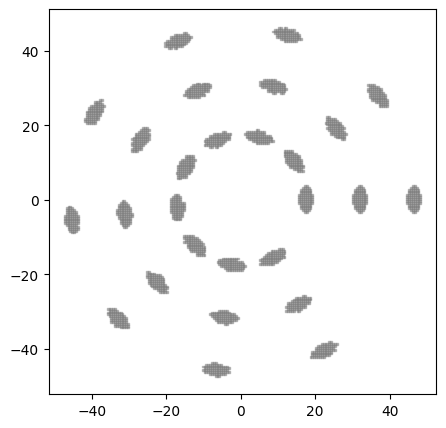

--------------------------------------------------
label: VentHole Chromosome_171: ['DonutShape_171', 'CornerTransformation_409']
predict: (0.28882296871953717, 373.40962699999994, 457.8746232999999)
biased_fitness: 0.6236810563264801, fitness: 0.7053490613046292
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


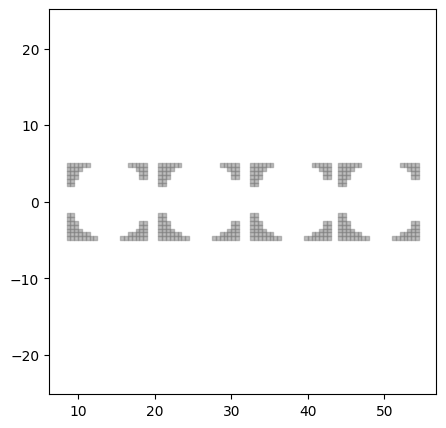

--------------------------------------------------
label: VentHole Chromosome_431: ['RayShape_409', 'GridStrictTransformation_409']
predict: (0.2912504584702331, 374.0704014999999, 457.5668647999999)
biased_fitness: 0.5870078443167369, fitness: 0.6793090837976697
shape parameter:
parameter_list: [ upper_slope: 1.0747880767010933, nose_point: 1.19259352592516, lower_coefficient: 2.9196450121786457, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


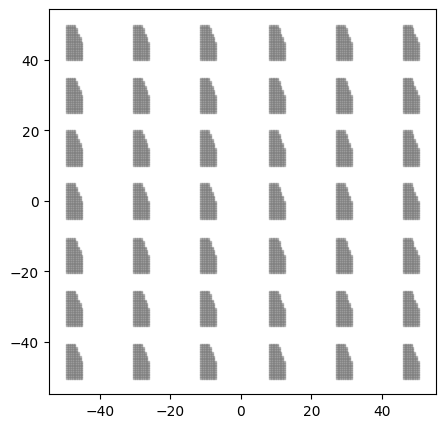

--------------------------------------------------
label: VentHole Chromosome_449: ['HoleShape_221', 'CornerTransformation_204']
predict: (0.2897569347684201, 373.52533580000005, 456.8714324999998)
biased_fitness: 0.6120333692421183, fitness: 0.7004468108157994
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


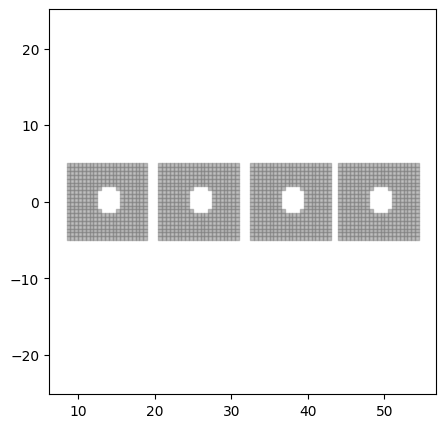

--------------------------------------------------
label: VentHole Chromosome_418: ['CircleShape_467', 'CornerTransformation_105']
predict: (0.2882270149166706, 373.0787311999999, 458.52005939999987)
biased_fitness: 0.6323880163666127, fitness: 0.7097358978332954
shape parameter:
parameter_list: [ r: nan, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.455250351999505, phi: 0.37077157619400763, rot_count: 0.0, ]


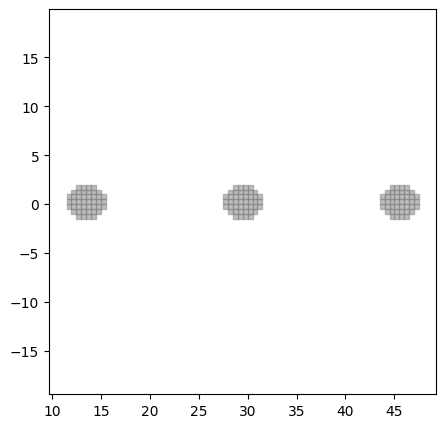

--------------------------------------------------
label: VentHole Chromosome_463: ['CircleShape_467', 'CircularStrictTransformation_105']
predict: (0.2895088438092053, 372.8737066999999, 458.36528899999985)
biased_fitness: 0.6157770751711268, fitness: 0.6987165834079484
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.476265005982341, dx: 5.438720629264258, phi: 0.5711986642890533, ]


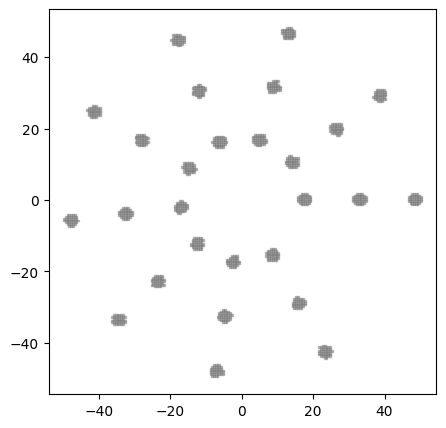

--------------------------------------------------
label: VentHole Chromosome_10: ['DonutShape_100', 'CornerTransformation_267']
predict: (0.28988599947144533, 373.09026109999996, 456.10806240000005)
biased_fitness: 0.6139285770997652, fitness: 0.7051483877855464
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 4.525498228946987, phi: 0.37077157619400763, rot_count: 0.0, ]


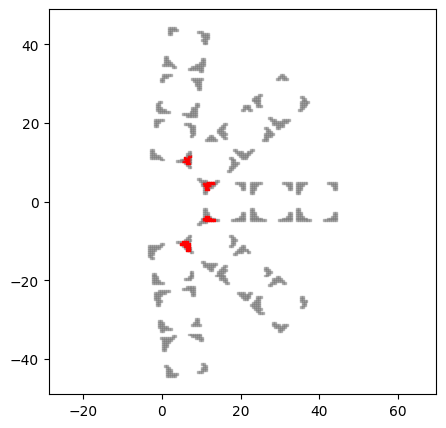

--------------------------------------------------
label: VentHole Chromosome_260: ['DonutShape_2', 'GridStrictTransformation_495']
predict: (0.2969573108362571, 374.26027939999994, 460.61665489999984)
biased_fitness: 0.5000629414924012, fitness: 0.60604222013743
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


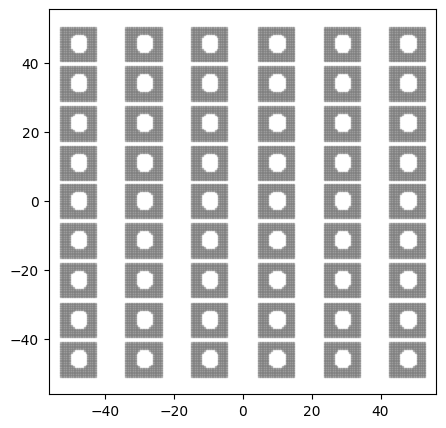

--------------------------------------------------
label: VentHole Chromosome_413: ['DonutShape_309', 'CircularStrictTransformation_418']
predict: (0.29088385081168533, 373.3543912, 458.3254195)
biased_fitness: 0.5942032936364052, fitness: 0.6827624383831465
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


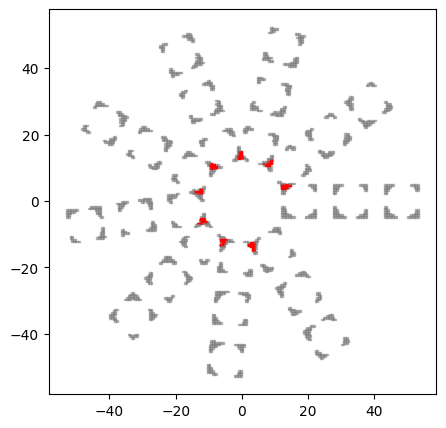

--------------------------------------------------
label: VentHole Chromosome_6: ['TrapezoidShape_434', 'CircularStrictTransformation_409']
predict: (0.29409222530137513, 373.5345508000001, 458.9034224999999)
biased_fitness: 0.5472292467807478, fitness: 0.6468878804862486
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 4.27255042283659, phi: 0.5711986642890533, ]


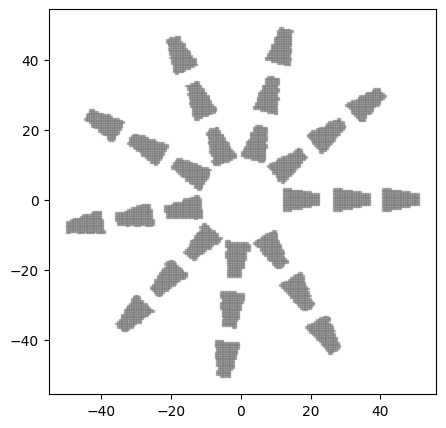

--------------------------------------------------
label: VentHole Chromosome_322: ['DonutShape_431', 'GridStrictTransformation_384']
predict: (0.29661929189311986, 374.88478030000005, 462.67128280000014)
biased_fitness: 0.4975634463963212, fitness: 0.5960267655688003
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


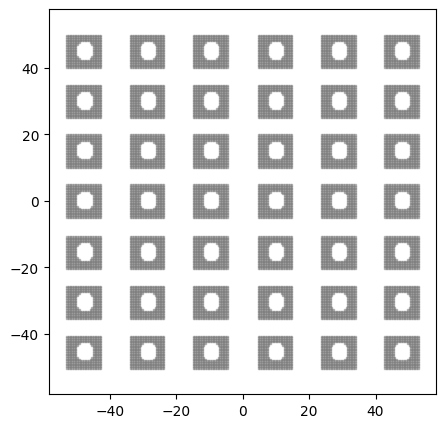

--------------------------------------------------
label: VentHole Chromosome_208: ['TriangleShape_221', 'GridStrictTransformation_192']
predict: (0.2913779007636603, 373.5913936999998, 458.78270570000007)
biased_fitness: 0.5851870094087561, fitness: 0.6743504953633973
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


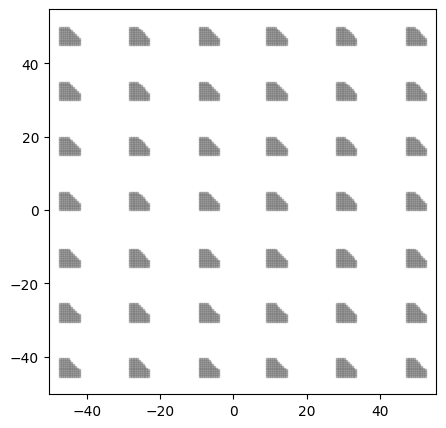

--------------------------------------------------
label: VentHole Chromosome_204: ['DonutShape_432', 'CornerTransformation_463']
predict: (0.289472943634691, 373.64853740000007, 458.6656625999997)
biased_fitness: 0.6118047769143261, fitness: 0.6936995636530912
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


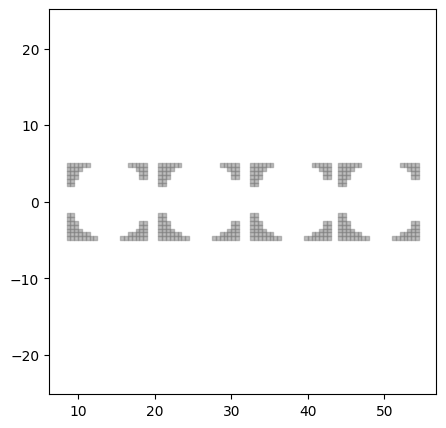

--------------------------------------------------
label: VentHole Chromosome_171: ['DonutShape_344', 'CornerTransformation_245']
predict: (0.292988016417397, 373.64736609999983, 457.05070539999986)
biased_fitness: 0.5658295288564427, fitness: 0.6666294783260313
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


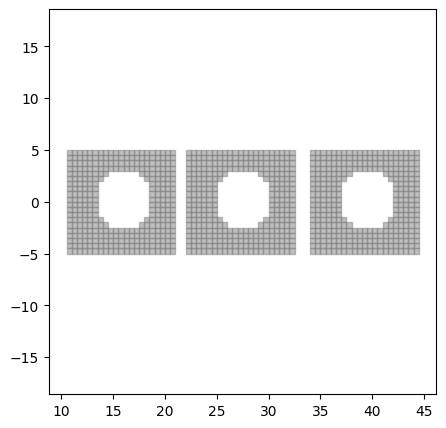

--------------------------------------------------
label: VentHole Chromosome_322: ['DonutShape_62', 'CornerTransformation_430']
predict: (0.28882296871953717, 373.40962699999994, 457.8746232999999)
biased_fitness: 0.6236810563264801, fitness: 0.7053490613046292
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


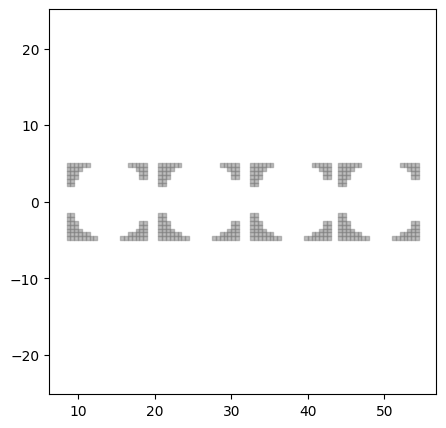

--------------------------------------------------
label: VentHole Chromosome_219: ['RayShape_260', 'CornerTransformation_467']
predict: (0.28921680316829024, 373.13088059999995, 455.7497652000002)
biased_fitness: 0.6238108222439365, fitness: 0.7134287393170968
shape parameter:
parameter_list: [ upper_slope: 1.2818882590902942, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


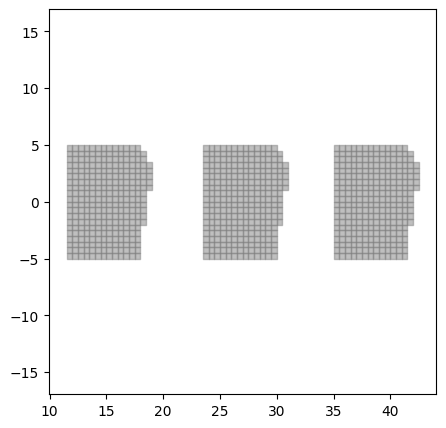

--------------------------------------------------
label: VentHole Chromosome_430: ['HoleShape_219', 'CircularStrictTransformation_93']
predict: (0.29639557677937667, 375.2090556000001, 462.0032505999997)
biased_fitness: 0.5004101458887266, fitness: 0.5999827012062341
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


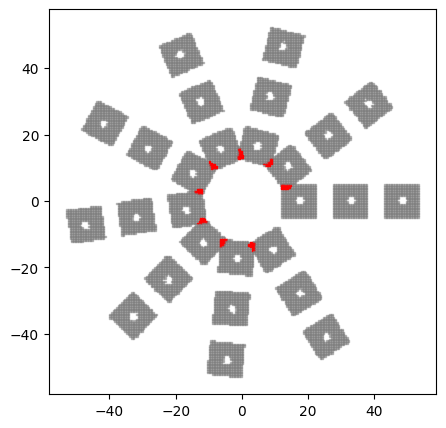

--------------------------------------------------
label: VentHole Chromosome_434: ['HoleShape_434', 'GridStrictTransformation_463']
predict: (0.2978977129645284, 374.44524800000016, 458.19691020000005)
biased_fitness: 0.4908119580966016, fitness: 0.607812079354715
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


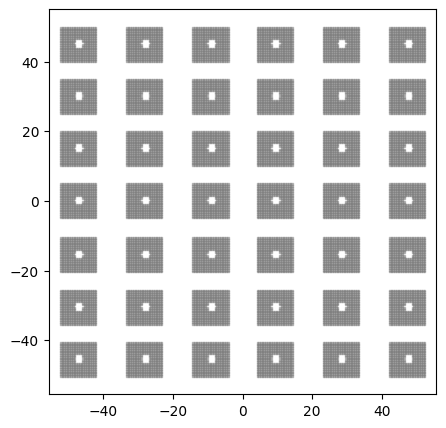

--------------------------------------------------
label: VentHole Chromosome_331: ['HoleShape_260', 'CircularStrictTransformation_204']
predict: (0.29719145100914934, 373.9629321999999, 461.1351005999999)
biased_fitness: 0.4972348236719098, fitness: 0.6025953259085076
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 4.27255042283659, phi: 0.5711986642890533, ]


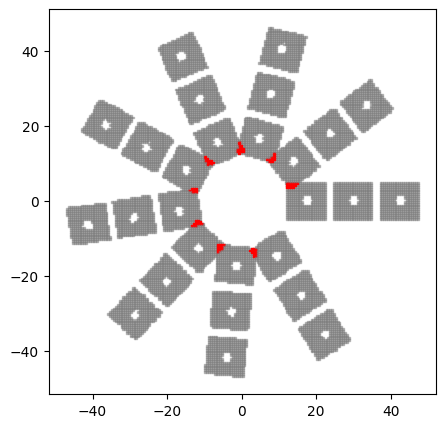

--------------------------------------------------
label: VentHole Chromosome_309: ['DonutShape_322', 'GridStrictTransformation_467']
predict: (0.29662186297766846, 374.1032651, 460.8685617999999)
biased_fitness: 0.5050404692126418, fitness: 0.6089222357233159
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 1.4179650066526435, ]


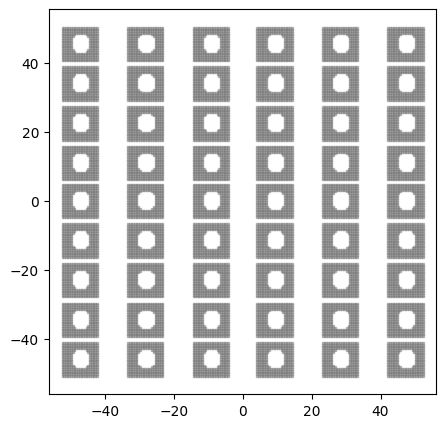

--------------------------------------------------
label: VentHole Chromosome_331: ['WingShape_384', 'CornerTransformation_204']
predict: (0.2881749361308197, 373.1388679, 456.4265637999999)
biased_fitness: 0.6370034270685248, fitness: 0.7204234801918038
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


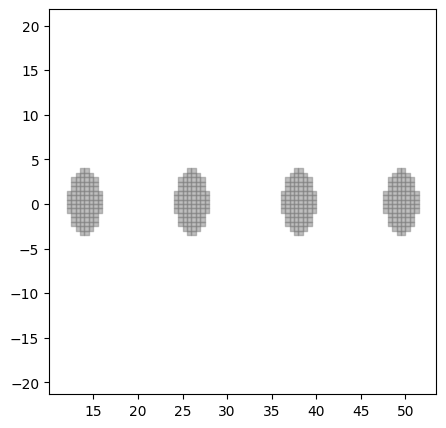

--------------------------------------------------
label: VentHole Chromosome_491: ['RayShape_171', 'GridStrictTransformation_234']
predict: (0.2912504584702331, 374.0704014999999, 457.5668647999999)
biased_fitness: 0.5870078443167369, fitness: 0.6793090837976697
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


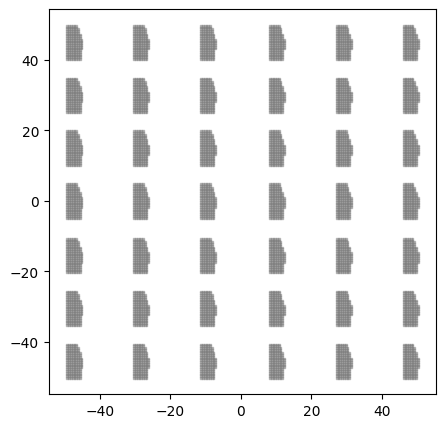

--------------------------------------------------
label: VentHole Chromosome_219: ['HoleShape_221', 'CircularStrictTransformation_6']
predict: (0.2961636213534722, 373.88489480000004, 459.6612719999997)
biased_fitness: 0.5149622830513896, fitness: 0.6206329524652793
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 9.561798125337678, dx: 4.596876541114454, phi: 0.5711986642890533, ]


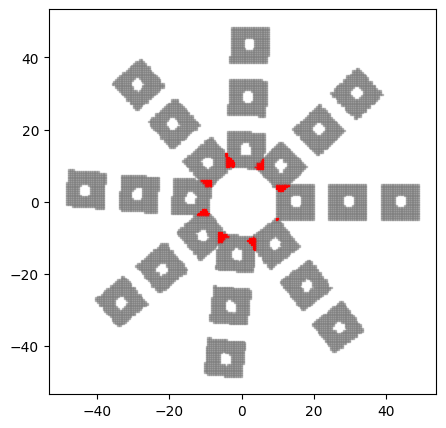

--------------------------------------------------
label: VentHole Chromosome_221: ['HoleShape_449', 'CircularStrictTransformation_260']
predict: (0.2967518230433486, 373.90984429999975, 460.26109439999993)
biased_fitness: 0.5054030670931213, fitness: 0.6116270760665158
shape parameter:
parameter_list: [ hole_r: 3.8103065938352927, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 4.27255042283659, phi: 0.5711986642890533, ]


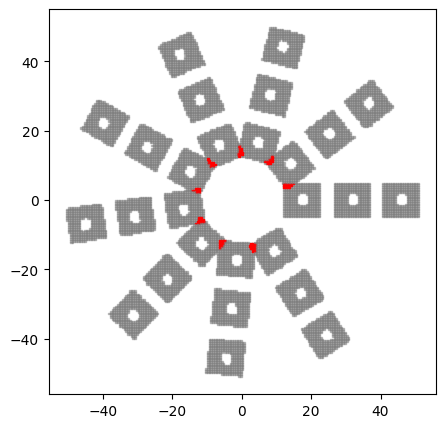

--------------------------------------------------
label: VentHole Chromosome_344: ['DonutShape_171', 'CircularStrictTransformation_430']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


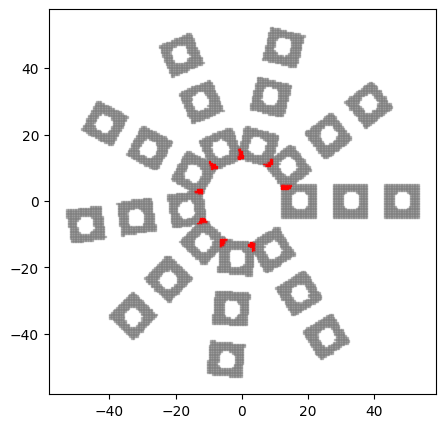

--------------------------------------------------
label: VentHole Chromosome_100: ['DoubleParabolicShape_384', 'CornerTransformation_331']
predict: (0.28819520843825996, 373.13159899999994, 458.29032659999996)
biased_fitness: 0.6330284336643607, fitness: 0.7109382876174007
shape parameter:
parameter_list: [ lower_coefficient: 1.735834911474334, upper_coefficient: 2.3982536536445167, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


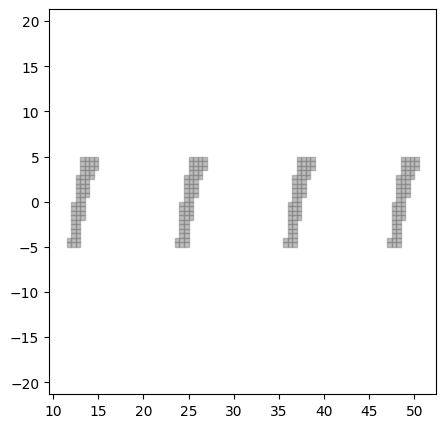

--------------------------------------------------
label: VentHole Chromosome_219: ['HoleShape_413', 'CornerTransformation_431']
predict: (0.28926690045759873, 373.72576239999995, 456.66037539999974)
biased_fitness: 0.6183138307936185, fitness: 0.7054003064240142
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


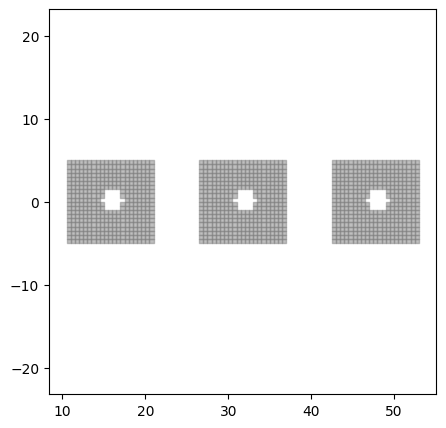

--------------------------------------------------
label: VentHole Chromosome_413: ['WingShape_495', 'GridStrictTransformation_309']
predict: (0.291123599219542, 372.87592279999996, 456.1708952999999)
biased_fitness: 0.5975482063264121, fitness: 0.6935299173045805
shape parameter:
parameter_list: [ c: 3.562670728817001, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


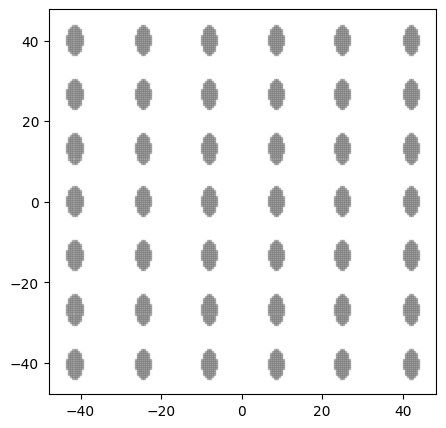

--------------------------------------------------
label: VentHole Chromosome_384: ['CircleShape_10', 'GridStrictTransformation_431']
predict: (0.29057474981703457, 373.3423497, 458.36347679999994)
biased_fitness: 0.598514800461516, fitness: 0.6857233693296545
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


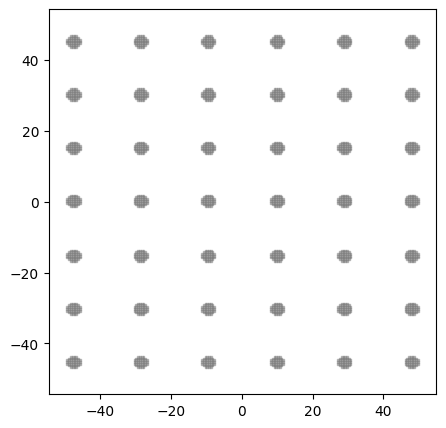

--------------------------------------------------
label: VentHole Chromosome_409: ['DoubleParabolicShape_432', 'CircularStrictTransformation_331']
predict: (0.29135544862959617, 373.0001282000002, 456.8817349000001)
biased_fitness: 0.5922596083856525, fitness: 0.6870361982040369
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


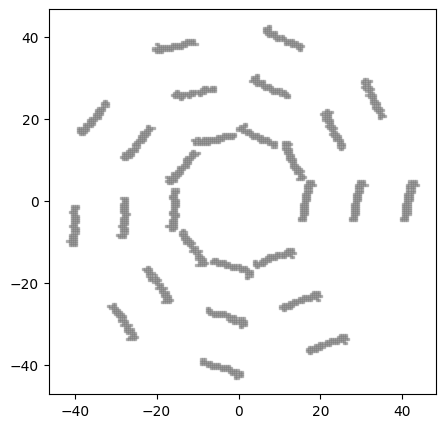

--------------------------------------------------
label: VentHole Chromosome_432: ['DonutShape_62', 'CircularStrictTransformation_309']
predict: (0.29735300563634337, 373.41366119999986, 462.47196770000005)
biased_fitness: 0.4950456796911933, fitness: 0.5970417991365666
shape parameter:
parameter_list: [ r_inner: 2.5011392051815418, r_outer: 8.546401441938373, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


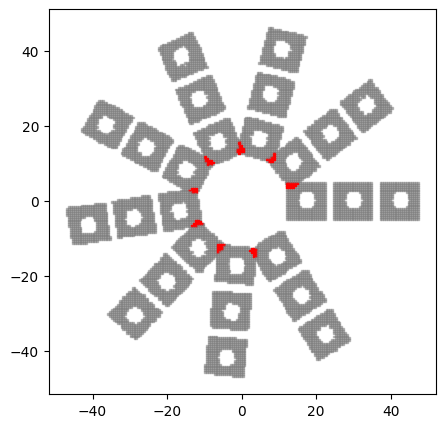

--------------------------------------------------
label: VentHole Chromosome_449: ['TrapezoidShape_495', 'GridStrictTransformation_322']
predict: (0.2946920225819807, 373.17899700000004, 458.61729180000003)
biased_fitness: 0.54118211525227, fitness: 0.6440983301801927
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 5.153642441096798, ]


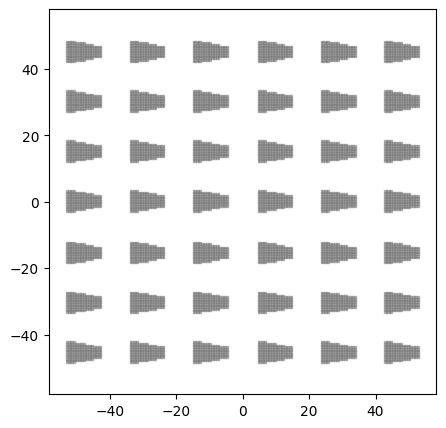

--------------------------------------------------
label: VentHole Chromosome_434: ['HoleShape_434', 'GridStrictTransformation_431']
predict: (0.29791023283670026, 374.50763390000014, 458.9316642000001)
biased_fitness: 0.4888552423861952, fitness: 0.603701181132996
shape parameter:
parameter_list: [ hole_r: 2.426311911955944, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


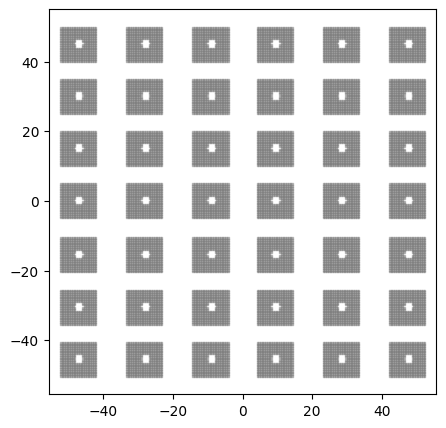

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_260', 'GridStrictTransformation_62']
predict: (0.29213416327703157, 372.99096429999963, 458.2594887000001)
biased_fitness: 0.5786479152215596, fitness: 0.6724061022296857
shape parameter:
parameter_list: [ lower_coefficient: 2.181982530560244, upper_coefficient: 1.540847481465331, lower_y-intercept: 3.9197146643145437, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ dx: 8.87161278033011, dy: 5.153642441096798, ]


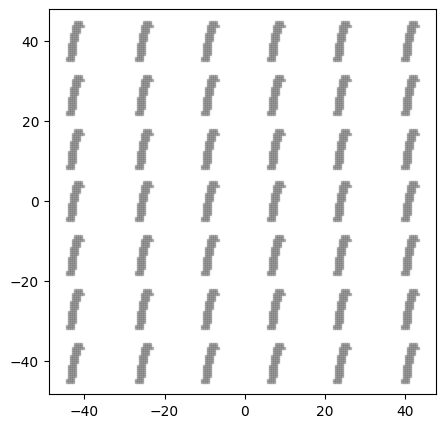

--------------------------------------------------
label: VentHole Chromosome_384: ['DoubleParabolicShape_376', 'CircularStrictTransformation_409']
predict: (0.2904353546875478, 372.9911963, 456.3559478000001)
biased_fitness: 0.6062371572743308, fitness: 0.6989107326245216
shape parameter:
parameter_list: [ lower_coefficient: 1.735834911474334, upper_coefficient: 2.3982536536445167, lower_y-intercept: 3.3248678215777243, upper_y-intercept_from_lower_y: 1.980066899672332, lower_x_trans: -0.8066652779870731, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 2.3690112753898536, phi: 0.5711986642890533, ]


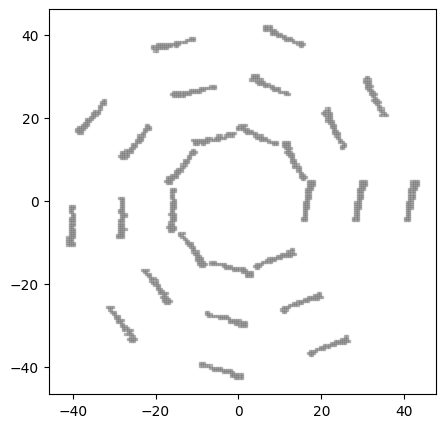

--------------------------------------------------
label: VentHole Chromosome_344: ['DonutShape_362', 'CornerTransformation_449']
predict: (0.2884708385411532, 373.5204125000001, 456.4014469)
biased_fitness: 0.6310033041238549, fitness: 0.7156823175884677
shape parameter:
parameter_list: [ r_inner: 5.341731706920493, r_outer: 7.550618986443403, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 5.940483191382726, phi: 0.37077157619400763, rot_count: 0.0, ]


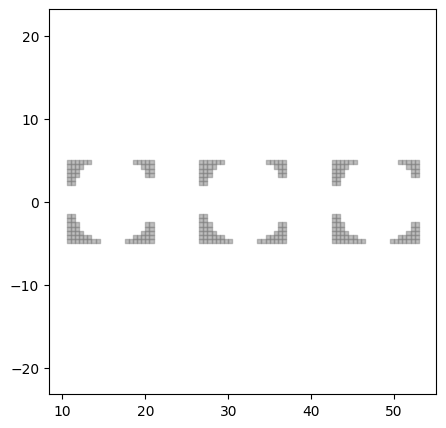

--------------------------------------------------
label: VentHole Chromosome_171: ['DonutShape_449', 'CornerTransformation_449']
predict: (0.2893266715711449, 373.37086880000004, 456.8360179999997)
biased_fitness: 0.6189002180039719, fitness: 0.7056988502885524
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 8.754093736366364, ]
pattern parameter:
parameter_list: [ di: 10.802425128004753, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


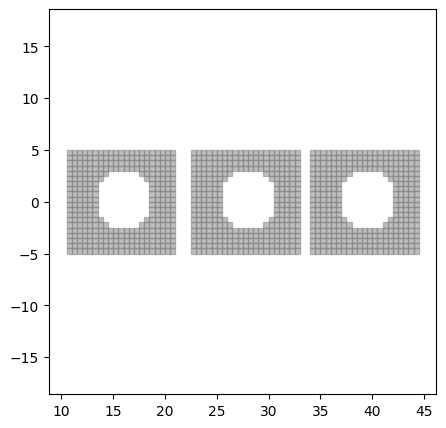

--------------------------------------------------
label: VentHole Chromosome_449: ['RayShape_344', 'CornerTransformation_434']
predict: (0.29025923220203276, 373.528274, 457.98467459999983)
biased_fitness: 0.6027600299715415, fitness: 0.6898429349796731
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 8.834707741699615, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


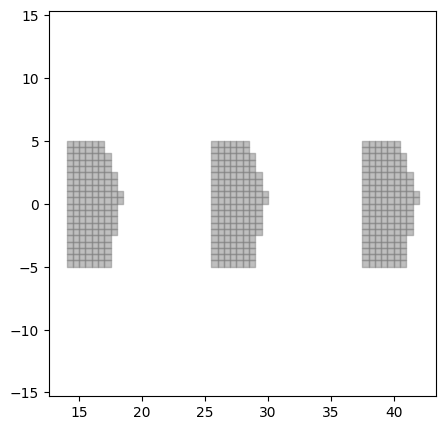

--------------------------------------------------
label: VentHole Chromosome_389: ['RayShape_384', 'CircularStrictTransformation_208']
predict: (0.2921869221830953, 372.9462836999999, 458.5355663000001)
biased_fitness: 0.5775805383366662, fitness: 0.6707215281690472
shape parameter:
parameter_list: [ upper_slope: 2.995464174067786, nose_point: 2.7382322150342295, lower_coefficient: 1.9034002456223742, lower_x-intercept: 3.822332689996303, lower_y-intercept: 3.9197146643145437, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


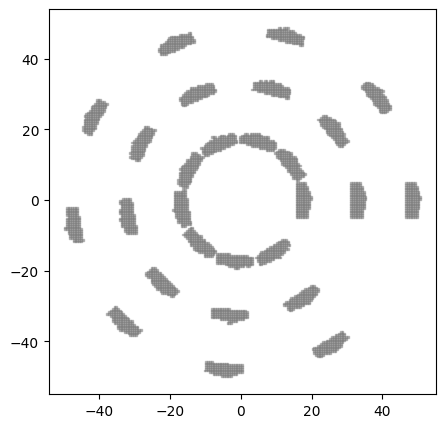

--------------------------------------------------
label: VentHole Chromosome_467: ['TrapezoidShape_149', 'CornerTransformation_171']
predict: (0.29174064481106843, 374.2781990000001, 460.78635159999993)
biased_fitness: 0.5726672744450416, fitness: 0.6572707988893156
shape parameter:
parameter_list: [ k1: 3.3344795585789186, k2: 1.4863452445160719, ]
pattern parameter:
parameter_list: [ di: 14.77269442818218, dx: 1.8480624940293526, phi: 0.37077157619400763, rot_count: 0.0, ]


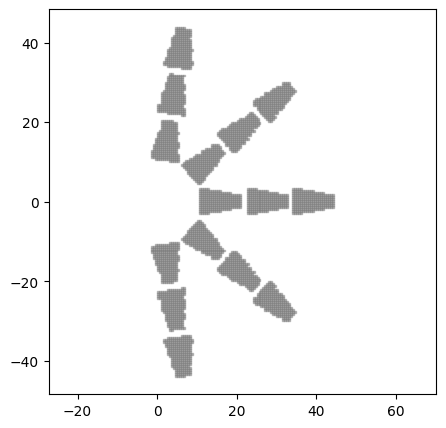

--------------------------------------------------
label: VentHole Chromosome_289: ['CircleShape_171', 'GridStrictTransformation_467']
predict: (0.2900967395966576, 373.0392230000002, 456.32077319999985)
biased_fitness: 0.6108079842467926, fitness: 0.7022326230334235
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ dx: 9.139782819030565, dy: 1.4179650066526435, ]


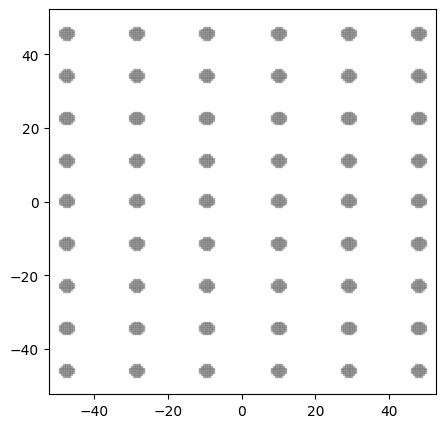

--------------------------------------------------
label: VentHole Chromosome_237: ['TriangleShape_289', 'CircularStrictTransformation_434']
predict: (0.2913979201734789, 373.3155962, 457.36736179999986)
biased_fitness: 0.5891164129712958, fitness: 0.6826060082652118
shape parameter:
parameter_list: [ l: 6.046947921773761, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


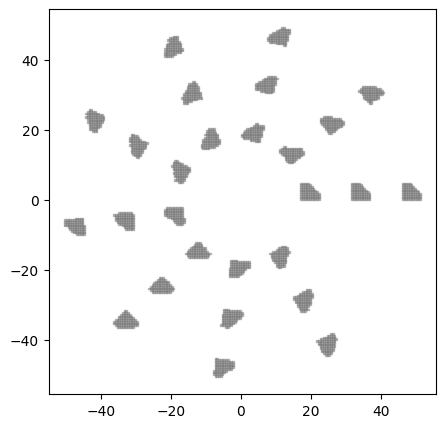

--------------------------------------------------
label: VentHole Chromosome_418: ['DonutShape_491', 'CircularStrictTransformation_413']
predict: (0.2957622435644711, 373.8724298, 456.81068179999966)
biased_fitness: 0.5263450774974048, fitness: 0.6389620063552903
shape parameter:
parameter_list: [ r_inner: 2.9874822987806833, r_outer: 9.409121334072783, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.39269908169872414, ]


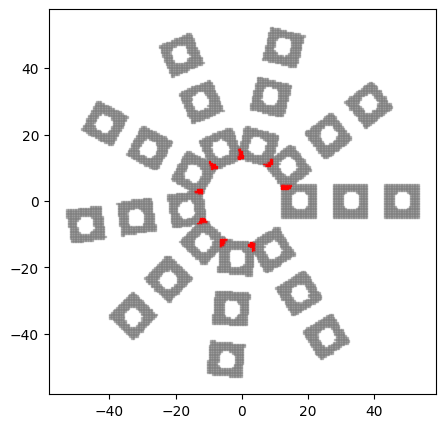

--------------------------------------------------
label: VentHole Chromosome_100: ['CircleShape_245', 'CircularStrictTransformation_491']
predict: (0.28940358474629724, 373.26883680000014, 457.1576996)
biased_fitness: 0.6176902303518378, fitness: 0.7038314705370268
shape parameter:
parameter_list: [ r: 1.6085908440877401, ]
pattern parameter:
parameter_list: [ di: 12.271788119255476, dx: 5.438720629264258, phi: 0.5711986642890533, ]


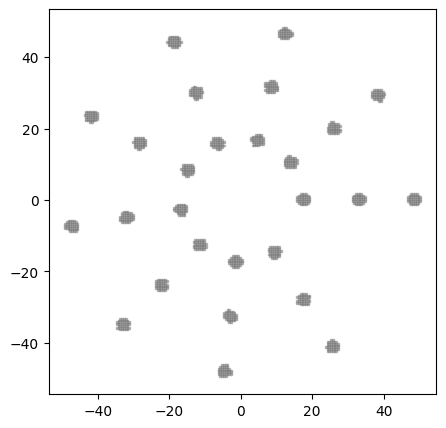

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )